/home/mamunds/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/tmp/ipykernel_1162295/3789828629.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders['month']=orders['created_at'].dt.to_period('M')
/tmp/ipykernel_1162295/3789828629.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  first = orders.groupby('customer_id')['created_at'].min().dt.to_period('M')


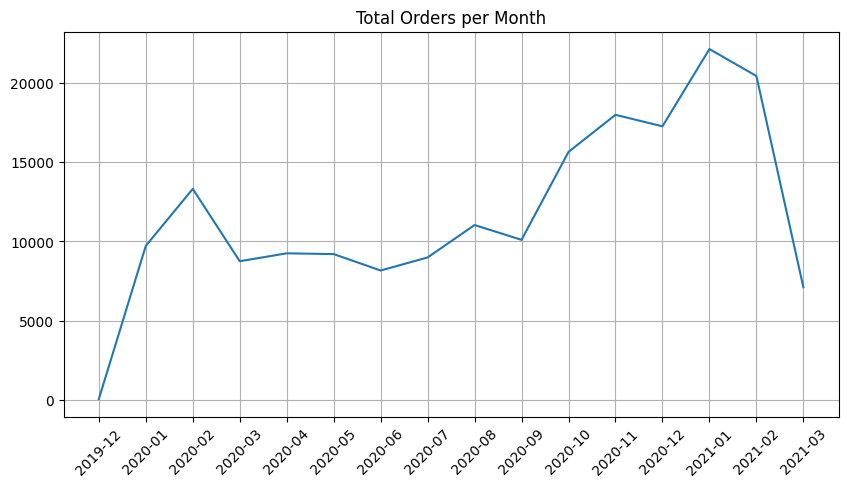

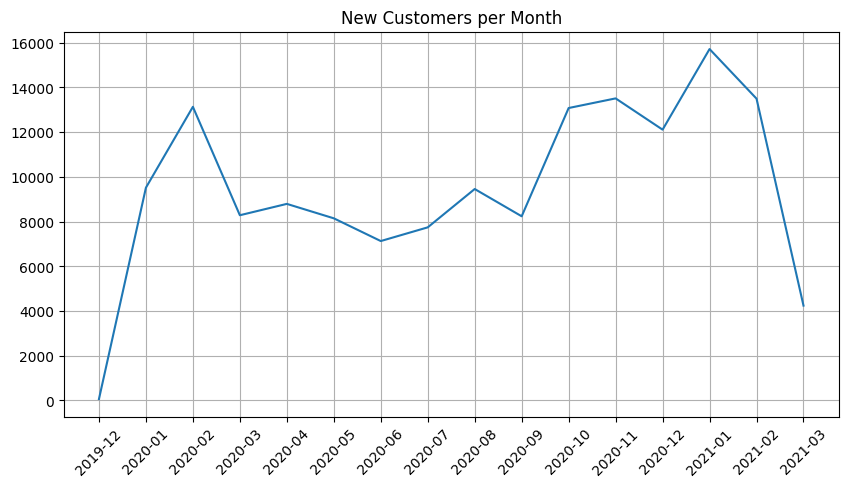

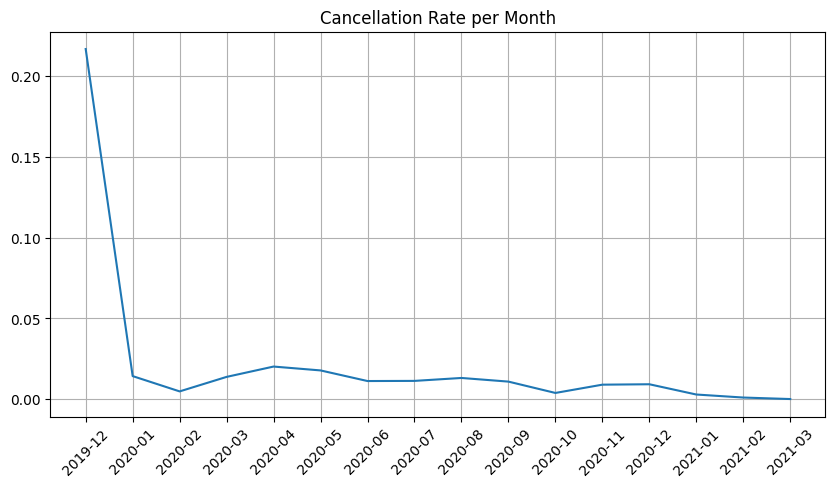

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

orders = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/orders_data.csv')
orders['created_at']=pd.to_datetime(orders['created_at'])
orders['month']=orders['created_at'].dt.to_period('M')

# Monthly orders
monthly_orders = orders.groupby('month')['order_number'].count()

# New customers per month
first = orders.groupby('customer_id')['created_at'].min().dt.to_period('M')
new_customers = first.value_counts().sort_index()

# Cancellation rate
orders['cancelled']=orders['cancelled_at'].notna()
cancel_rate = orders.groupby('month')['cancelled'].mean()

# Plot 1: Monthly orders
plt.figure(figsize=(10,5))
plt.plot(monthly_orders.index.astype(str), monthly_orders.values)
plt.xticks(rotation=45)
plt.title("Total Orders per Month")
plt.grid(True)
plt.show()

# Plot 2: New customers
plt.figure(figsize=(10,5))
plt.plot(new_customers.index.astype(str), new_customers.values)
plt.xticks(rotation=45)
plt.title("New Customers per Month")
plt.grid(True)
plt.show()

# Plot 3: Cancellation Rate
plt.figure(figsize=(10,5))
plt.plot(cancel_rate.index.astype(str), cancel_rate.values)
plt.xticks(rotation=45)
plt.title("Cancellation Rate per Month")
plt.grid(True)
plt.show()


/tmp/ipykernel_1162295/3531156805.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders['order_month']=orders['created_at'].dt.to_period('M')


<Figure size 1000x1000 with 0 Axes>

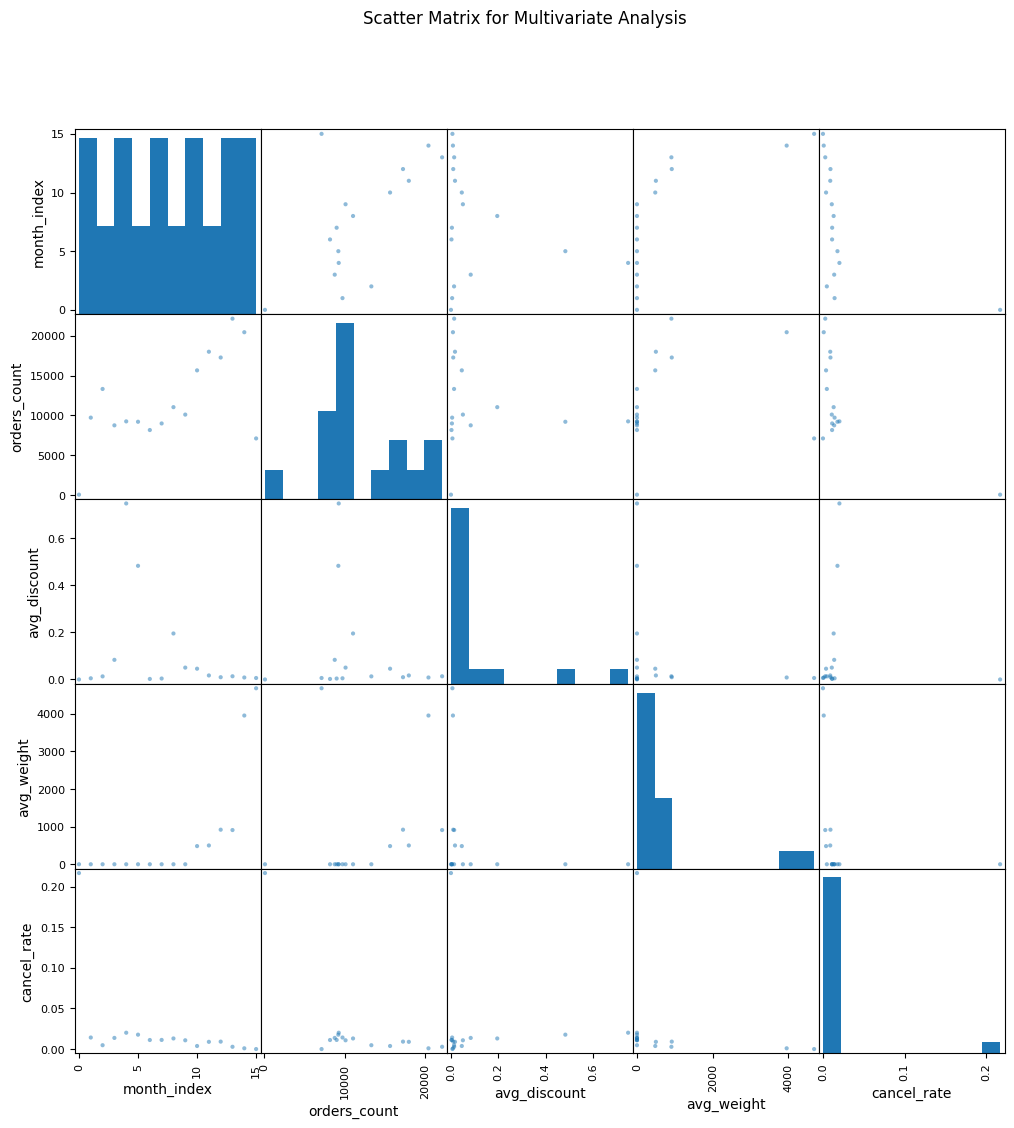

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Load data
orders = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/orders_data.csv')
products = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/products_data.csv')

# Prepare numeric fields
orders['created_at']=pd.to_datetime(orders['created_at'])
orders['order_month']=orders['created_at'].dt.to_period('M')
orders['cancelled']=orders['cancelled_at'].notna().astype(int)

# Aggregate monthly metrics
monthly = orders.groupby('order_month').agg(
    orders_count=('order_number','count'),
    avg_discount=('total_discounts','mean'),
    avg_weight=('total_weight','mean'),
    cancel_rate=('cancelled','mean')
).reset_index()

# Convert period to int index for plotting
monthly['month_index'] = range(len(monthly))

# Select numeric for scatter matrix
numeric = monthly[['month_index','orders_count','avg_discount','avg_weight','cancel_rate']]

# Plot scatter matrix
plt.figure(figsize=(10,10))
scatter_matrix(numeric, figsize=(12,12))
plt.suptitle("Scatter Matrix for Multivariate Analysis")
plt.show()


/tmp/ipykernel_1162295/3675690533.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders['order_month'] = orders['created_at'].dt.to_period('M')


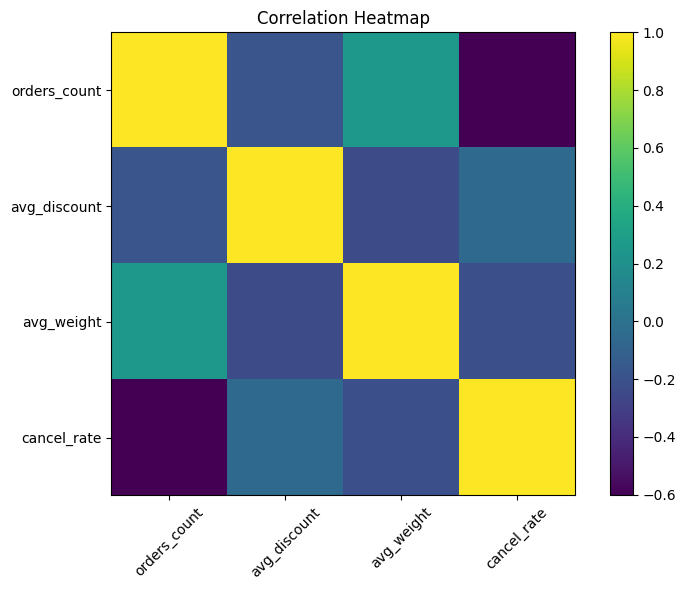

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
orders = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/orders_data.csv')
orders['created_at'] = pd.to_datetime(orders['created_at'])
orders['order_month'] = orders['created_at'].dt.to_period('M')
orders['cancelled'] = orders['cancelled_at'].notna().astype(int)

# Monthly aggregates
monthly = orders.groupby('order_month').agg(
    orders_count=('order_number','count'),
    avg_discount=('total_discounts','mean'),
    avg_weight=('total_weight','mean'),
    cancel_rate=('cancelled','mean')
).reset_index()

# Compute correlation matrix
corr = monthly[['orders_count','avg_discount','avg_weight','cancel_rate']].corr()

# Plot heatmap using matplotlib
plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=45)
plt.yticks(ticks=np.arange(len(corr.index)), labels=corr.index)
plt.tight_layout()
plt.show()


Orders: 189140
Merged: 190241
Missing products: 55580


/tmp/ipykernel_1162295/2116281788.py:36: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged['order_month'] = merged['created_at'].dt.to_period('M')


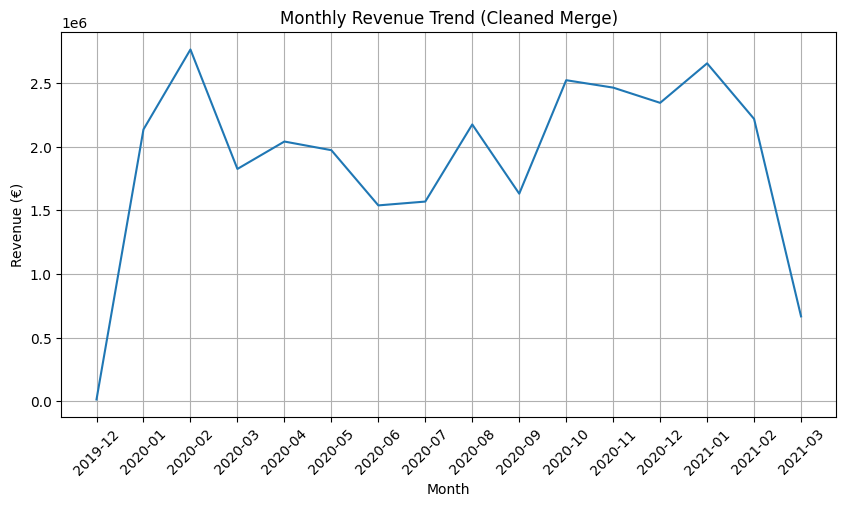

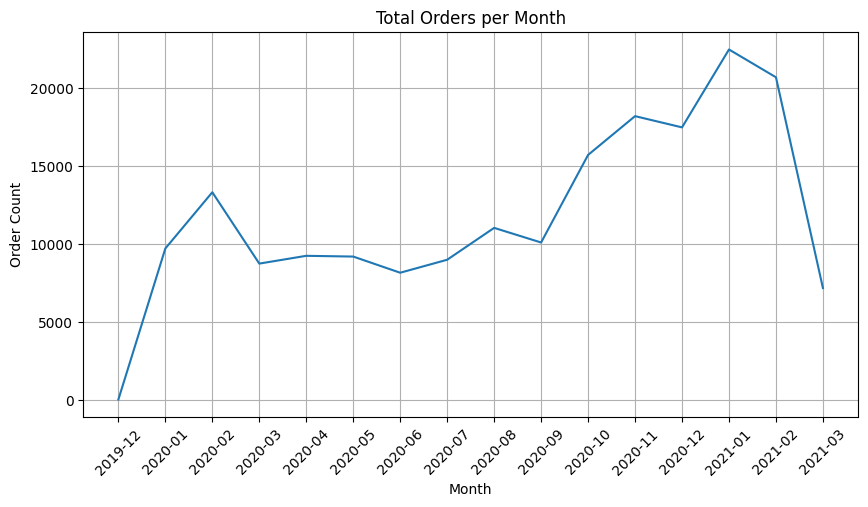

/tmp/ipykernel_1162295/2116281788.py:72: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  first_purchase = merged.groupby('customer_id')['created_at'].min().dt.to_period('M')


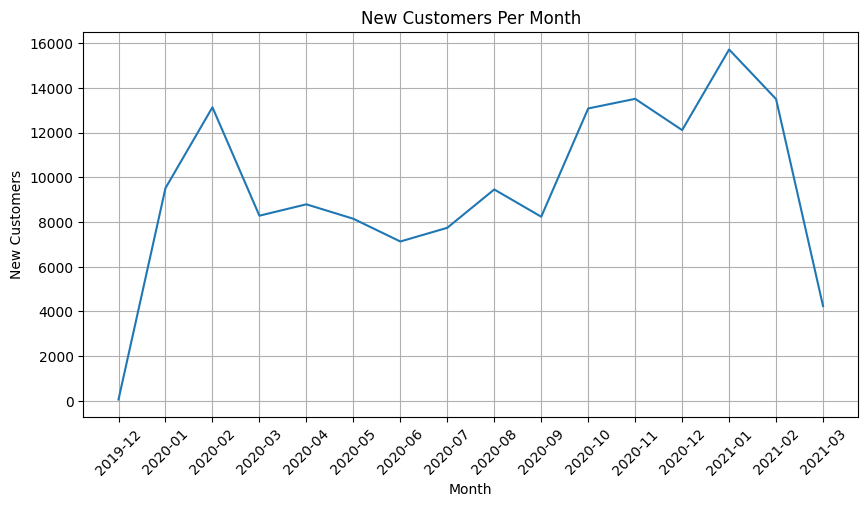

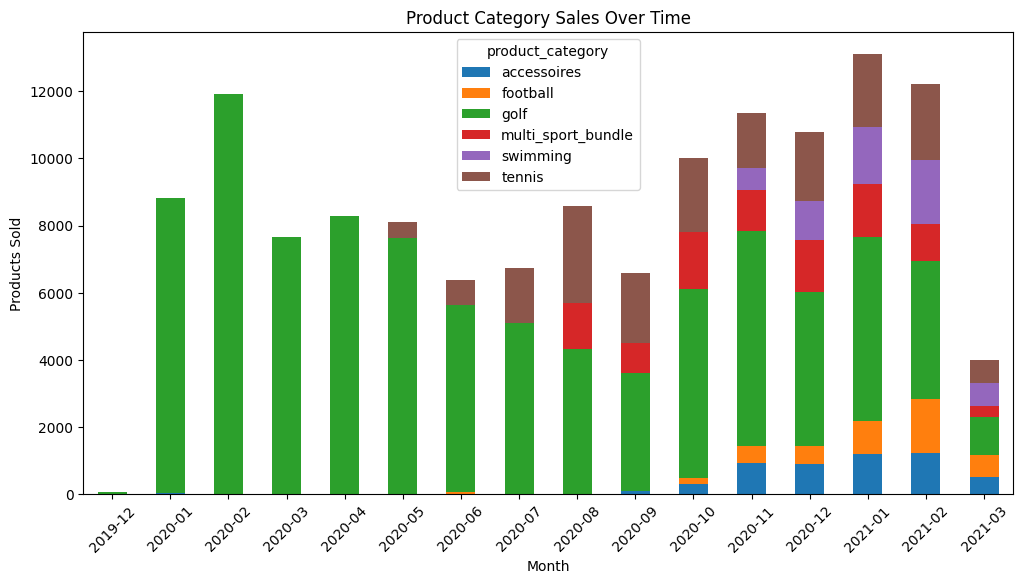

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================
# 1. LOAD DATA
# ============================================================
orders = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/orders_data.csv')
products = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/products_data.csv')

# ============================================================
# 2. CLEANING PRODUCT NAME FIELDS
# ============================================================

# Strip whitespace
orders['product_items_clean'] = orders['product_items'].str.strip()
products['product_title_clean'] = products['product_title'].str.strip()

# ============================================================
# 3. MERGE — CORRECT & CLEAN
# ============================================================
merged = orders.merge(
    products,
    left_on='product_items_clean',
    right_on='product_title_clean',
    how='left'
)

print("Orders:", len(orders))
print("Merged:", len(merged))
print("Missing products:", merged['product_title'].isna().sum())

# ============================================================
# 4. PREPARE DATE COLUMNS
# ============================================================
merged['created_at'] = pd.to_datetime(merged['created_at'])
merged['order_month'] = merged['created_at'].dt.to_period('M')

# Create revenue column
merged['revenue'] = merged['product_price']

# ============================================================
# 5. GRAPH 1 — MONTHLY REVENUE
# ============================================================
monthly_revenue = merged.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values)
plt.title("Monthly Revenue Trend (Cleaned Merge)")
plt.xlabel("Month")
plt.ylabel("Revenue (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ============================================================
# 6. GRAPH 2 — TOTAL ORDERS PER MONTH
# ============================================================
monthly_orders = merged.groupby('order_month')['order_number'].count()

plt.figure(figsize=(10,5))
plt.plot(monthly_orders.index.astype(str), monthly_orders.values)
plt.title("Total Orders per Month")
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ============================================================
# 7. GRAPH 3 — NEW CUSTOMERS PER MONTH
# ============================================================
first_purchase = merged.groupby('customer_id')['created_at'].min().dt.to_period('M')
new_customers = first_purchase.value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(new_customers.index.astype(str), new_customers.values)
plt.title("New Customers Per Month")
plt.xlabel("Month")
plt.ylabel("New Customers")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ============================================================
# 8. GRAPH 4 — PRODUCT CATEGORY SALES OVER TIME
# ============================================================
category_sales = merged.groupby(['order_month', 'product_category']).size().unstack(fill_value=0)

category_sales.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Product Category Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Products Sold")
plt.xticks(rotation=45)
plt.show()


In [6]:
merged.head()

,billing_address_country,billing_address_zip,customer_id,order_number,total_discounts,cancel_reason,processed_at,total_weight,cancelled_at,created_at,product_items,first_date_order,order_month,product_type,product_price,product_category,product_title,revenue
0,Germany,81371,43539353630,1,0,customer,2019-12-03 13:08:32 UTC,0,2019-12-04 09:00:44 UTC,2019-12-03 13:08:33+00:00,Golf_set_with_caddy_shoes_and_50_balls,2019-12-03 13:08:33 UTC,2019-12,mixed_set_golf,259.99,golf,Golf_set_with_caddy_shoes_and_50_balls,259.99
1,Germany,12045,43973434860,2,0,customer,2019-12-04 09:23:09 UTC,0,2020-01-20 14:55:25 UTC,2019-12-04 09:23:09+00:00,Golf_set_with_caddy_shoes_and_50_balls,2019-12-04 09:23:09 UTC,2019-12,mixed_set_golf,259.99,golf,Golf_set_with_caddy_shoes_and_50_balls,259.99
2,Germany,8315,46668580946,3,0,NaN,2019-12-06 07:58:34 UTC,0,NaN,2019-12-06 07:58:34+00:00,Golf_set_with_caddy_shoes_and_50_balls,2019-12-06 07:58:34 UTC,2019-12,mixed_set_golf,259.99,golf,Golf_set_with_caddy_shoes_and_50_balls,259.99
3,Germany,91301,40345377076,4,0,NaN,2019-12-06 18:29:03 UTC,0,NaN,2019-12-06 18:29:04+00:00,Golf_set_with_caddy_shoes_and_50_balls,2019-12-06 18:29:04 UTC,2019-12,mixed_set_golf,259.99,golf,Golf_set_with_caddy_shoes_and_50_balls,259.99
4,Germany,8577,33355469588,5,0,NaN,2019-12-08 18:16:40 UTC,0,NaN,2019-12-08 18:16:40+00:00,Golf_set_with_caddy_shoes_and_50_balls,2019-12-08 18:16:40 UTC,2019-12,mixed_set_golf,259.99,golf,Golf_set_with_caddy_shoes_and_50_balls,259.99


In [12]:
len(orders), len(merged)


(189140, 190241)

In [8]:
orders['product_items'].isin(products['product_title']).mean()



0.7061435973353072

In [15]:
import pandas as pd

# Load
orders = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/orders_data.csv')
products = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/products_data.csv')

# Clean whitespace
orders['product_items'] = orders['product_items'].str.strip()
products['product_title'] = products['product_title'].str.strip()

# Merge
merged = orders.merge(
    products,
    left_on='product_items',
    right_on='product_title',
    how='left'
)

print("Total orders:", len(orders))
print("Merged rows:", len(merged))
print("Missing product matches:", merged['product_title'].isna().sum())


Total orders: 189140
Merged rows: 190241
Missing product matches: 55580


/tmp/ipykernel_1162295/119759160.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders['order_month'] = orders['created_at'].dt.to_period('M')
/tmp/ipykernel_1162295/119759160.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .dt.to_period('M')


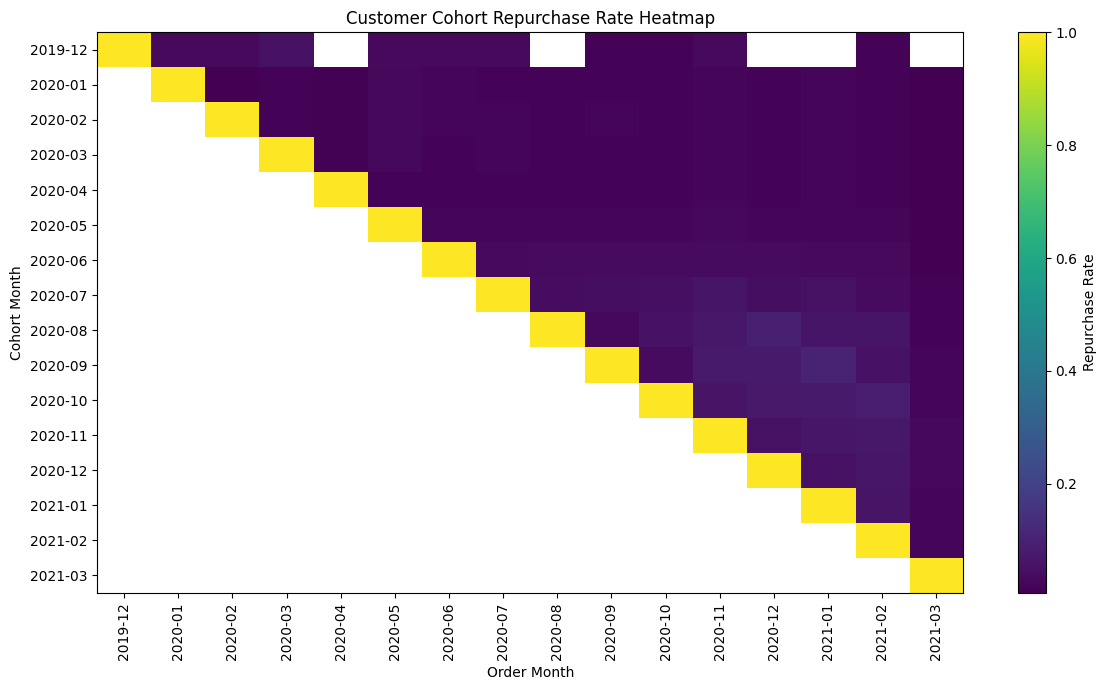

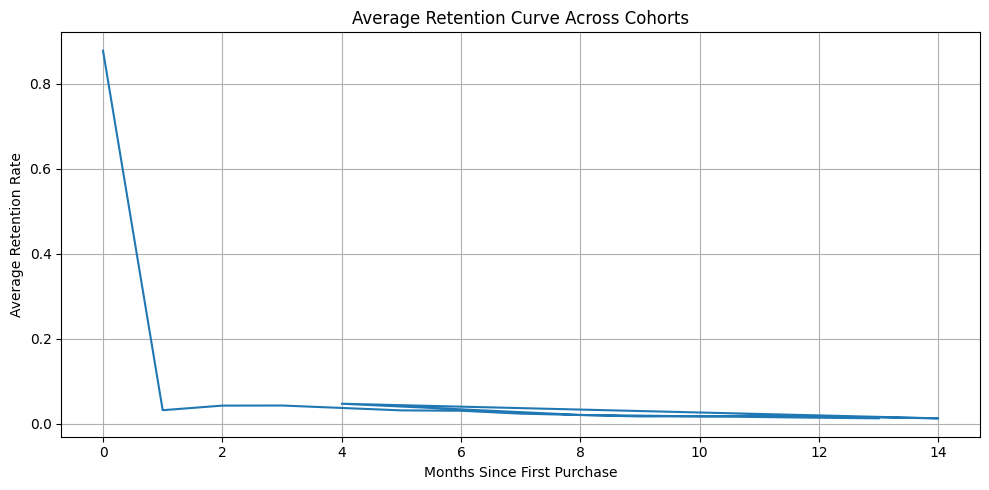

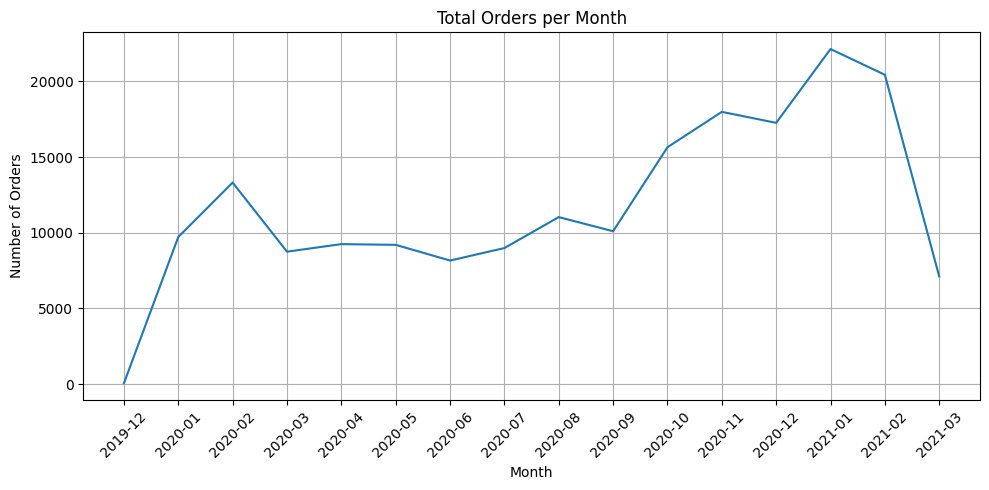

/tmp/ipykernel_1162295/119759160.py:102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .dt.to_period('M')


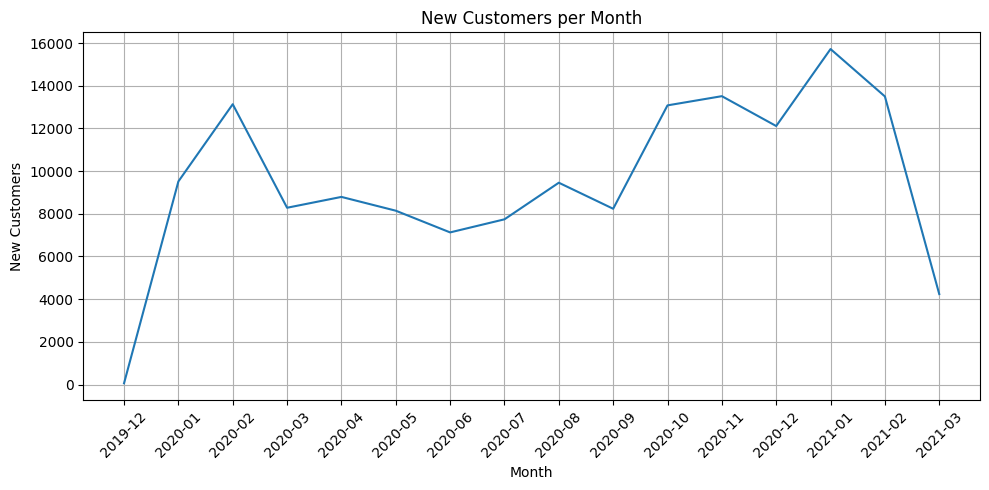

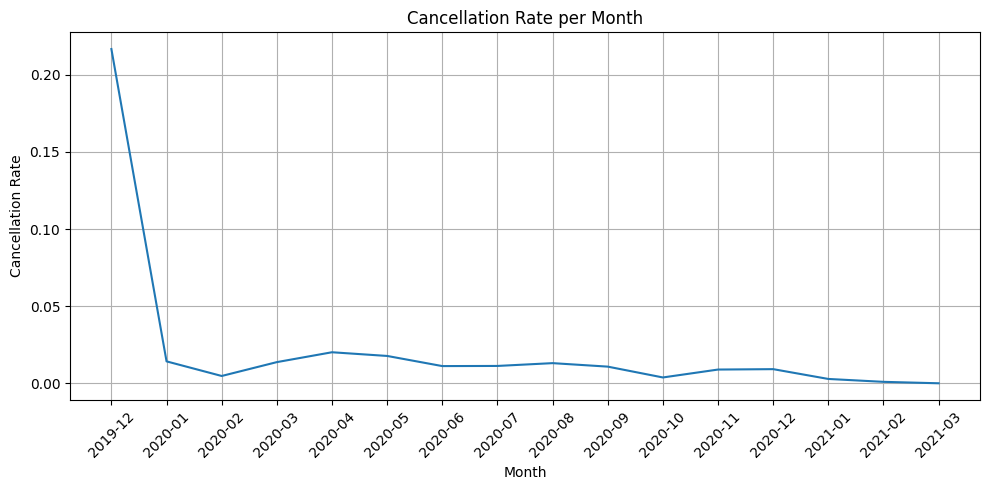

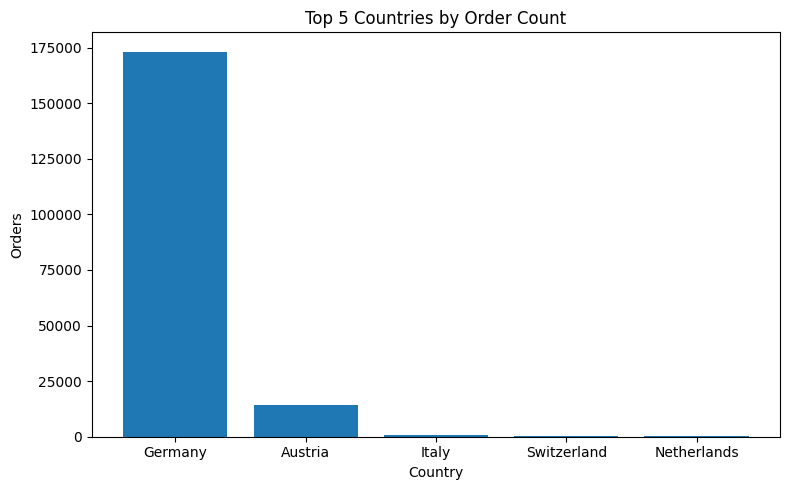

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========= Load data =========
orders = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/orders_data.csv')
products = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/products_data.csv')

orders['created_at'] = pd.to_datetime(orders['created_at'])
orders['order_month'] = orders['created_at'].dt.to_period('M')

# ========= Task 2a: Cohort Analysis =========

# Cohort = month of customer's first order
orders['cohort_month'] = (
    orders.groupby('customer_id')['created_at']
    .transform('min')
    .dt.to_period('M')
)

# Cohort sizes
cohort_sizes = orders.groupby('cohort_month')['customer_id'].nunique()

# Unique customers per cohort and month
cohort = (
    orders.groupby(['cohort_month', 'order_month'])['customer_id']
    .nunique()
    .reset_index()
)

cohort_pivot = cohort.pivot(
    index='cohort_month',
    columns='order_month',
    values='customer_id'
)

# Repurchase rates
repurchase_rate = cohort_pivot.div(cohort_sizes, axis=0)

# Heatmap
plt.figure(figsize=(12, 7))
plt.imshow(repurchase_rate, aspect='auto')
plt.title("Customer Cohort Repurchase Rate Heatmap")
plt.xlabel("Order Month")
plt.ylabel("Cohort Month")
plt.xticks(
    ticks=np.arange(len(repurchase_rate.columns)),
    labels=[str(c) for c in repurchase_rate.columns],
    rotation=90
)
plt.yticks(
    ticks=np.arange(len(repurchase_rate.index)),
    labels=[str(i) for i in repurchase_rate.index]
)
plt.colorbar(label="Repurchase Rate")
plt.tight_layout()
plt.show()

# ===== Retention curve by months since first purchase =====
rate_numeric = pd.DataFrame()

for cohort_month in repurchase_rate.index:
    row = repurchase_rate.loc[cohort_month].dropna()
    indexed_vals = []
    for m in row.index:
        idx = (m.to_timestamp() - cohort_month.to_timestamp()).days // 30
        indexed_vals.append((idx, row[m]))
    for idx, val in indexed_vals:
        rate_numeric.loc[cohort_month, idx] = val

avg_retention = rate_numeric.mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_retention.index, avg_retention.values)
plt.title("Average Retention Curve Across Cohorts")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Average Retention Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


# ========= Task 2b: Business Development Metrics =========

# (1) Monthly orders
monthly_orders = orders.groupby('order_month')['order_number'].count()

plt.figure(figsize=(10,5))
plt.plot(monthly_orders.index.astype(str), monthly_orders.values)
plt.title("Total Orders per Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# (2) New customers per month
first_purchase = (
    orders.groupby('customer_id')['created_at']
    .min()
    .dt.to_period('M')
)

new_customers = first_purchase.value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(new_customers.index.astype(str), new_customers.values)
plt.title("New Customers per Month")
plt.xlabel("Month")
plt.ylabel("New Customers")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# (3) Cancellation rate per month
orders['cancelled'] = orders['cancelled_at'].notna().astype(int)
cancel_rate = orders.groupby('order_month')['cancelled'].mean()

plt.figure(figsize=(10,5))
plt.plot(cancel_rate.index.astype(str), cancel_rate.values)
plt.title("Cancellation Rate per Month")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# (4) Top 5 countries
country_counts = orders['billing_address_country'].value_counts().head(5)

plt.figure(figsize=(8,5))
plt.bar(country_counts.index.astype(str), country_counts.values)
plt.title("Top 5 Countries by Order Count")
plt.xlabel("Country")
plt.ylabel("Orders")
plt.tight_layout()
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

/tmp/ipykernel_1162295/2060649701.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders['order_month'] = orders['created_at'].dt.to_period('M')
/tmp/ipykernel_1162295/2060649701.py:20: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .dt.to_period('M')


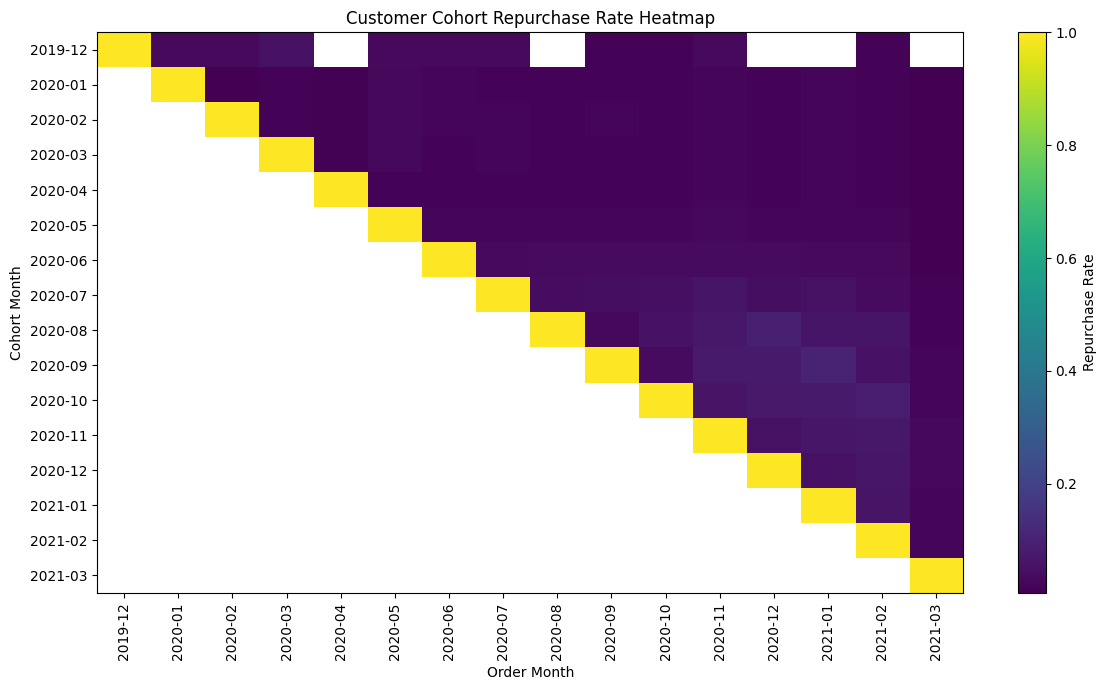

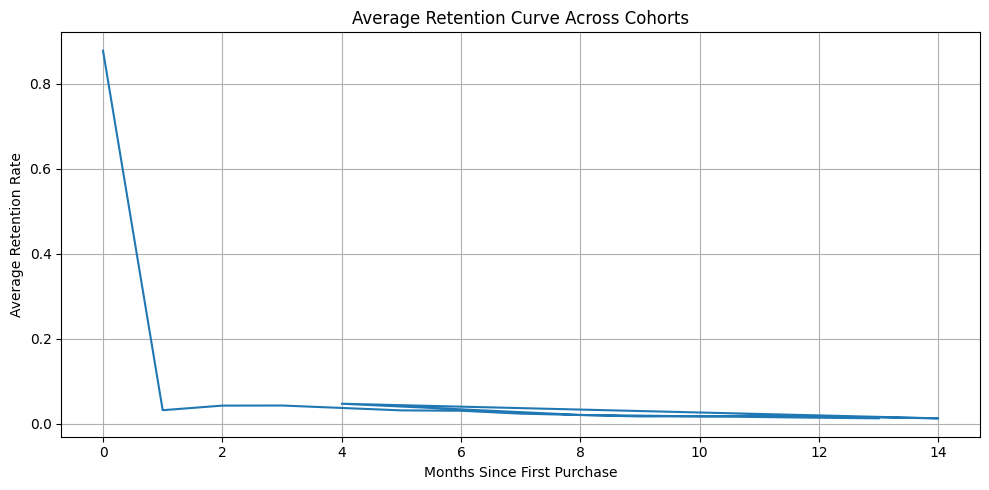

Average retention (first few ages):
0    0.877434
1    0.031696
2    0.042478
3    0.042704
5    0.031264
dtype: float64
Merged_ex shape: (265371, 19)
Missing prices after merge: 0


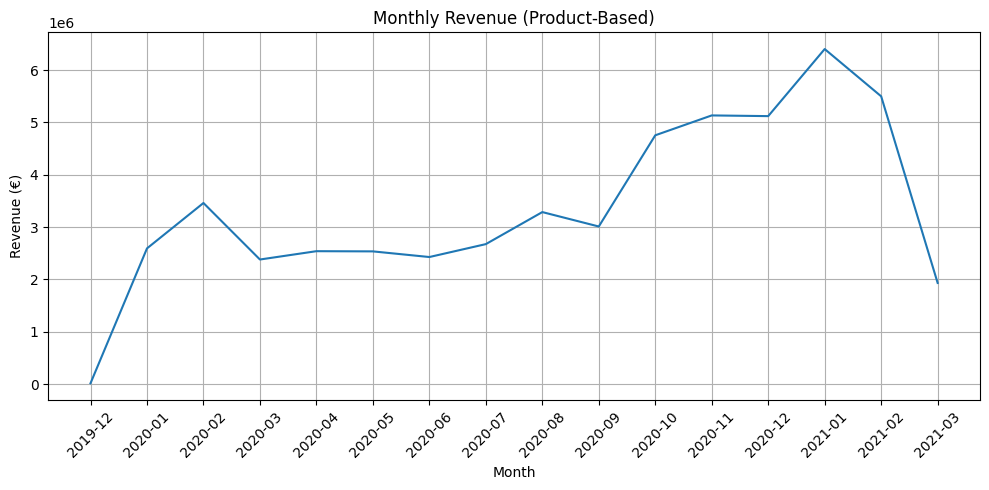

Monthly revenue (first 5 months):
order_month
2019-12      16659.36
2020-01    2592603.50
2020-02    3459912.44
2020-03    2380501.02
2020-04    2539597.09
Freq: M, Name: revenue, dtype: float64


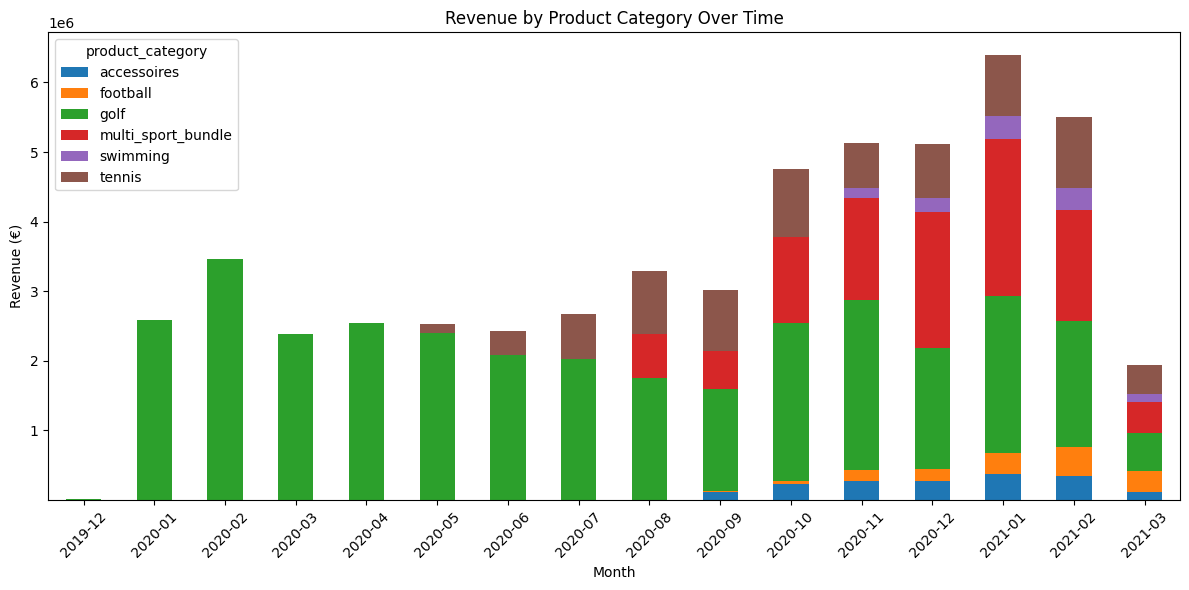

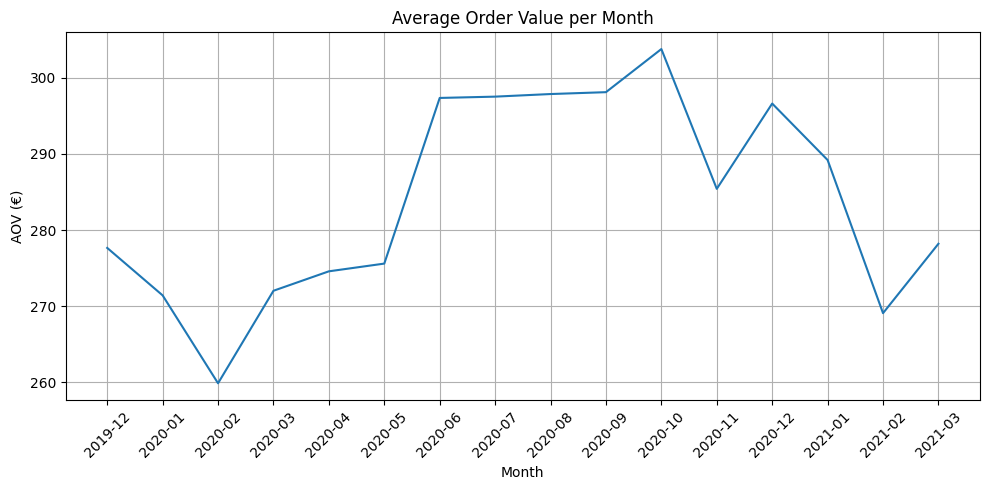

AOV (first 5 months):
order_month
2019-12    277.656000
2020-01    271.419964
2020-02    259.870245
2020-03    272.026171
2020-04    274.580721
Freq: M, Name: revenue, dtype: float64


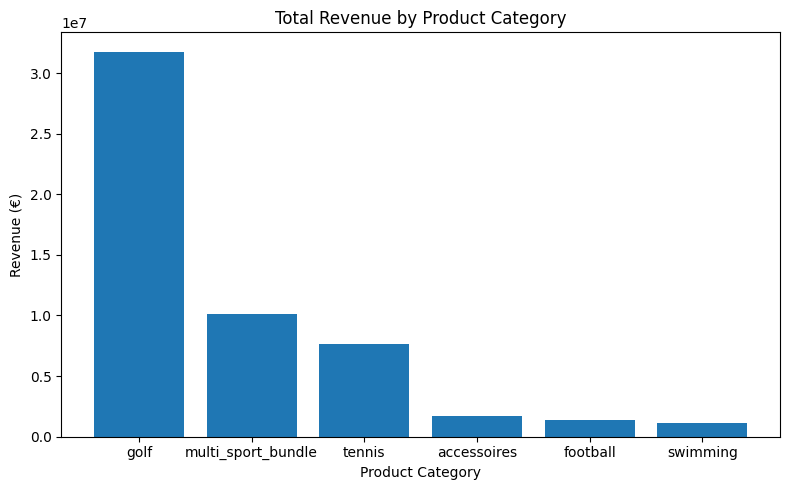

Total revenue by category:
product_category
golf                  31791620.80
multi_sport_bundle    10121472.95
tennis                 7607237.90
accessoires            1731631.62
football               1397055.51
swimming               1111560.24
Name: revenue, dtype: float64


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========= Load data =========
orders = pd.read_csv('./orders_data.csv')
products = pd.read_csv('./products_data.csv')

orders['created_at'] = pd.to_datetime(orders['created_at'])
orders['order_month'] = orders['created_at'].dt.to_period('M')

# =====================================================
# TASK 2a – CUSTOMER COHORT ANALYSIS (ORDERS ONLY)
# =====================================================

# Cohort = month of customer's first order
orders['cohort_month'] = (
    orders.groupby('customer_id')['created_at']
    .transform('min')
    .dt.to_period('M')
)

# Cohort sizes
cohort_sizes = orders.groupby('cohort_month')['customer_id'].nunique()

# Unique customers per cohort & order month
cohort = (
    orders
    .groupby(['cohort_month', 'order_month'])['customer_id']
    .nunique()
    .reset_index()
)

cohort_pivot = cohort.pivot(
    index='cohort_month',
    columns='order_month',
    values='customer_id'
)

# Repurchase rate matrix
repurchase_rate = cohort_pivot.div(cohort_sizes, axis=0)

# ---- Heatmap of repurchase rates ----
plt.figure(figsize=(12, 7))
plt.imshow(repurchase_rate, aspect='auto')
plt.title("Customer Cohort Repurchase Rate Heatmap")
plt.xlabel("Order Month")
plt.ylabel("Cohort Month")
plt.xticks(
    ticks=np.arange(len(repurchase_rate.columns)),
    labels=[str(c) for c in repurchase_rate.columns],
    rotation=90
)
plt.yticks(
    ticks=np.arange(len(repurchase_rate.index)),
    labels=[str(i) for i in repurchase_rate.index]
)
plt.colorbar(label="Repurchase Rate")
plt.tight_layout()
plt.show()

# ---- Retention curve by months since first purchase ----
rate_numeric = pd.DataFrame()

for cohort_month in repurchase_rate.index:
    row = repurchase_rate.loc[cohort_month].dropna()
    indexed_vals = []
    for m in row.index:
        idx = (m.to_timestamp() - cohort_month.to_timestamp()).days // 30
        indexed_vals.append((idx, row[m]))
    for idx, val in indexed_vals:
        rate_numeric.loc[cohort_month, idx] = val

avg_retention = rate_numeric.mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_retention.index, avg_retention.values)
plt.title("Average Retention Curve Across Cohorts")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Average Retention Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Average retention (first few ages):")
print(avg_retention.head())

# =====================================================
# TASK 2b – BUSINESS DEVELOPMENT (ORDERS + PRODUCTS)
# =====================================================

# ---- 1) Clean and deduplicate products ----
products_dedup = products.drop_duplicates('product_title').copy()
products_dedup['product_title'] = products_dedup['product_title'].str.strip()

# ---- 2) Split & explode product_items to atomic SKUs ----
orders['product_list'] = orders['product_items'].str.split(', ')
orders_exploded = orders.explode('product_list')
orders_exploded['product_list'] = orders_exploded['product_list'].str.strip()

# ---- 3) Merge exploded orders with product catalog ----
merged_ex = orders_exploded.merge(
    products_dedup,
    left_on='product_list',
    right_on='product_title',
    how='left'
)

print("Merged_ex shape:", merged_ex.shape)
print("Missing prices after merge:", merged_ex['product_price'].isna().sum())

# ---- 4) Monthly revenue (product-based) ----
merged_ex['revenue'] = merged_ex['product_price']
monthly_revenue = merged_ex.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values)
plt.title("Monthly Revenue (Product-Based)")
plt.xlabel("Month")
plt.ylabel("Revenue (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly revenue (first 5 months):")
print(monthly_revenue.head())

# ---- 5) Revenue by product category over time ----
rev_by_cat_month = (
    merged_ex
    .groupby(['order_month', 'product_category'])['revenue']
    .sum()
    .unstack(fill_value=0)
)

rev_by_cat_month.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Revenue by Product Category Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---- 6) Average order value (AOV) per month ----
order_revenue = (
    merged_ex
    .groupby(['order_number', 'order_month'])['revenue']
    .sum()
    .reset_index()
)

aov_by_month = order_revenue.groupby('order_month')['revenue'].mean()

plt.figure(figsize=(10, 5))
plt.plot(aov_by_month.index.astype(str), aov_by_month.values)
plt.title("Average Order Value per Month")
plt.xlabel("Month")
plt.ylabel("AOV (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print("AOV (first 5 months):")
print(aov_by_month.head())

# ---- 7) Total revenue by product category ----
total_rev_by_cat = (
    merged_ex
    .groupby('product_category')['revenue']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8, 5))
plt.bar(total_rev_by_cat.index.astype(str), total_rev_by_cat.values)
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Revenue (€)")
plt.tight_layout()
plt.show()

print("Total revenue by category:")
print(total_rev_by_cat)


/tmp/ipykernel_1162295/3679382441.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders['order_month'] = orders['created_at'].dt.to_period('M')
/tmp/ipykernel_1162295/3679382441.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders['cohort_month'] = orders.groupby('customer_id')['created_at'].transform('min').dt.to_period('M')


Merged rows: (265371, 20)
Missing prices: 0

Customer Summary:
       total_revenue       n_orders  avg_order_value
count  152665.000000  152665.000000    152665.000000
mean      352.147375       1.237107       288.251751
std       241.667378       0.687088       147.266795
min         0.200000       1.000000         0.200000
25%       199.990000       1.000000       199.990000
50%       269.990000       1.000000       259.990000
75%       459.980000       1.000000       314.980000
90%       609.970000       2.000000       479.980000
95%       839.960000       2.000000       559.980000
max     10849.340000      66.000000      1979.920000

Order count distribution (first 10):
n_orders
1     128164
2      17500
3       4406
4       1527
5        553
6        262
7        137
8         73
9         23
10         6
Name: count, dtype: int64

Revenue by segment:
segment
1 order        37138036.88
2-3 orders     13658482.65
4-10 orders     2914122.40
10+ orders        49937.09
Name: total_re

/tmp/ipykernel_1162295/3679382441.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rev_by_segment = cust_summary.groupby('segment')['total_revenue'].sum()



Cohort × Category share (sample):
  cohort_month product_category   revenue     share
0      2019-12      accessoires    129.97  0.005879
1      2019-12         football    869.94  0.039348
2      2019-12             golf  20109.22  0.909546
3      2019-12           tennis    999.95  0.045228
4      2020-01      accessoires  21885.82  0.006787

Country × Category Revenue:
product_category         accessoires    football         golf  \
billing_address_country                                         
Austria                    161607.98   120433.74   2268977.57   
Germany                   1543210.91  1255928.46  29310392.56   
Italy                       13445.66     1469.88     22718.87   
Luxembourg                   2709.43     2799.78     21149.00   
Switzerland                  5298.81     1549.83    112185.35   

product_category         multi_sport_bundle    swimming      tennis  
billing_address_country                                              
Austria                     

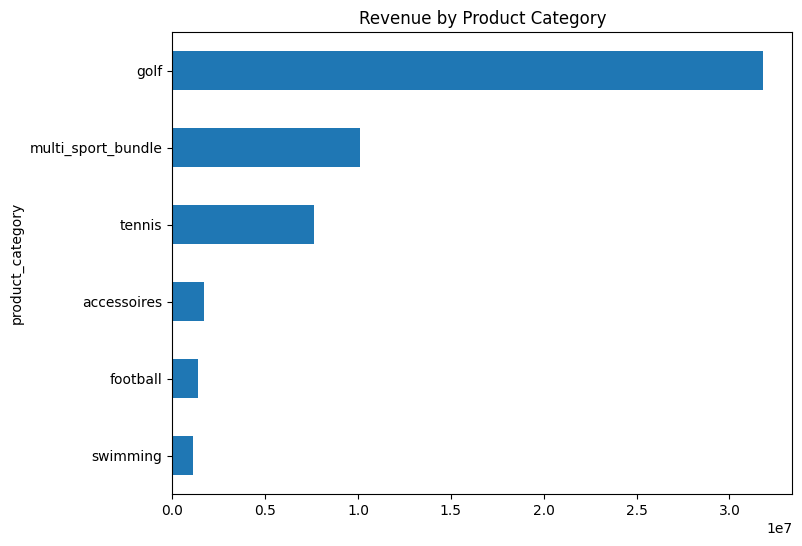

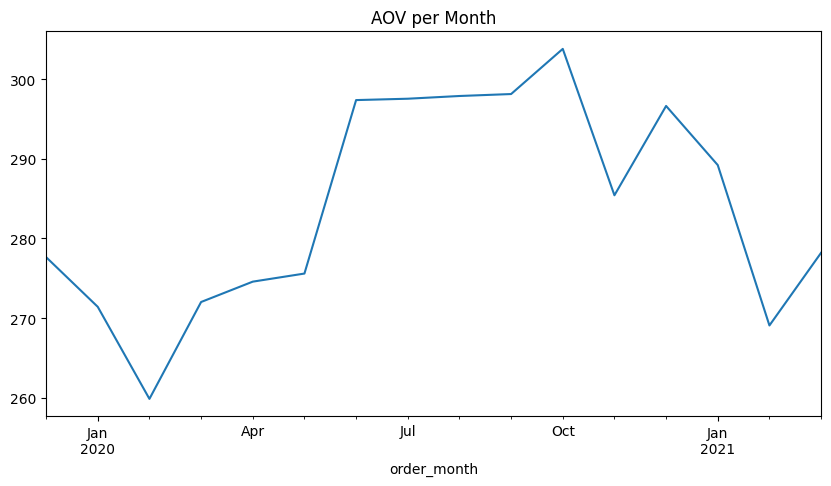

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ========= LOAD DATA =========
orders = pd.read_csv('./orders_data.csv')
products = pd.read_csv('./products_data.csv')

orders['created_at'] = pd.to_datetime(orders['created_at'])
orders['order_month'] = orders['created_at'].dt.to_period('M')
orders['cohort_month'] = orders.groupby('customer_id')['created_at'].transform('min').dt.to_period('M')

# ========= PREP PRODUCTS =========
products_dedup = products.drop_duplicates('product_title').copy()
products_dedup['product_title'] = products_dedup['product_title'].str.strip()

# ========= EXPLODE PRODUCTS PER ORDER =========
orders['product_list'] = orders['product_items'].str.split(', ')
orders_exploded = orders.explode('product_list')
orders_exploded['product_list'] = orders_exploded['product_list'].str.strip()

merged_ex = orders_exploded.merge(
    products_dedup,
    left_on='product_list',
    right_on='product_title',
    how='left'
)

merged_ex['revenue'] = merged_ex['product_price']

print("Merged rows:", merged_ex.shape)
print("Missing prices:", merged_ex['product_price'].isna().sum())

# ========= CUSTOMER SUMMARY =========
cust_rev = merged_ex.groupby('customer_id')['revenue'].sum()
cust_orders = orders.groupby('customer_id')['order_number'].nunique()

cust_summary = pd.DataFrame({
    'total_revenue': cust_rev,
    'n_orders': cust_orders
}).fillna(0)

cust_summary['avg_order_value'] = cust_summary['total_revenue'] / \
                                  cust_summary['n_orders'].replace(0, np.nan)

print("\nCustomer Summary:")
print(cust_summary.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95]))

# ========= ORDER COUNT DISTRIBUTION =========
print("\nOrder count distribution (first 10):")
print(cust_summary['n_orders'].value_counts().sort_index().head(10))

# ========= SEGMENT REVENUE =========
cust_summary['segment'] = pd.cut(
    cust_summary['n_orders'],
    bins=[0,1,3,10,1000],
    labels=['1 order','2-3 orders','4-10 orders','10+ orders']
)

rev_by_segment = cust_summary.groupby('segment')['total_revenue'].sum()
cust_count_by_segment = cust_summary['segment'].value_counts()

print("\nRevenue by segment:")
print(rev_by_segment)
print("\nCustomer count by segment:")
print(cust_count_by_segment)

# ========= COHORT CLV =========
cust_rev_with_cohort = merged_ex.groupby('customer_id')['revenue'].sum().reset_index()
cust_first_cohort = orders.groupby('customer_id')['cohort_month'].first().reset_index()

cust_cohort = cust_rev_with_cohort.merge(cust_first_cohort, on='customer_id', how='left')
clv_by_cohort = cust_cohort.groupby('cohort_month')['revenue'].mean()

print("\nCLV by cohort (first 5):")
print(clv_by_cohort.head())

# ========= COHORT × CATEGORY SHARE =========
cohort_cat = (
    merged_ex
    .groupby(['cohort_month','product_category'])['revenue']
    .sum()
    .reset_index()
)

cohort_tot = cohort_cat.groupby('cohort_month')['revenue'].transform('sum')
cohort_cat['share'] = cohort_cat['revenue'] / cohort_tot

print("\nCohort × Category share (sample):")
print(cohort_cat.head())

# ========= COUNTRY × CATEGORY REVENUE =========
country_cat = (
    merged_ex
    .groupby(['billing_address_country','product_category'])['revenue']
    .sum()
    .reset_index()
)

top_countries = merged_ex['billing_address_country'].value_counts().head(5).index.tolist()
country_cat_top = country_cat[country_cat['billing_address_country'].isin(top_countries)]

country_cat_top_pivot = country_cat_top.pivot(
    index='billing_address_country',
    columns='product_category',
    values='revenue'
).fillna(0)

print("\nCountry × Category Revenue:")
print(country_cat_top_pivot)

# ========= OPTIONAL PLOTS =========
# Uncomment these if you want visualization output

# 1) Revenue by category
total_rev_by_cat = merged_ex.groupby('product_category')['revenue'].sum().sort_values()
total_rev_by_cat.plot(kind='barh', figsize=(8,6), title='Revenue by Product Category')
plt.show()

#2) AOV per order_month
order_revenue = merged_ex.groupby(['order_number','order_month'])['revenue'].sum().reset_index()
aov_by_month = order_revenue.groupby('order_month')['revenue'].mean()
aov_by_month.plot(figsize=(10,5), title='AOV per Month')
plt.show()


In [23]:
missing = merged_ex['product_price'].isna().sum()
total = len(merged_ex)
print("Missing product matches:", missing)
print("Share missing:", missing / total)


Missing product matches: 0
Share missing: 0.0


/tmp/ipykernel_1162295/3135234717.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders['order_month'] = orders['created_at'].dt.to_period('M')


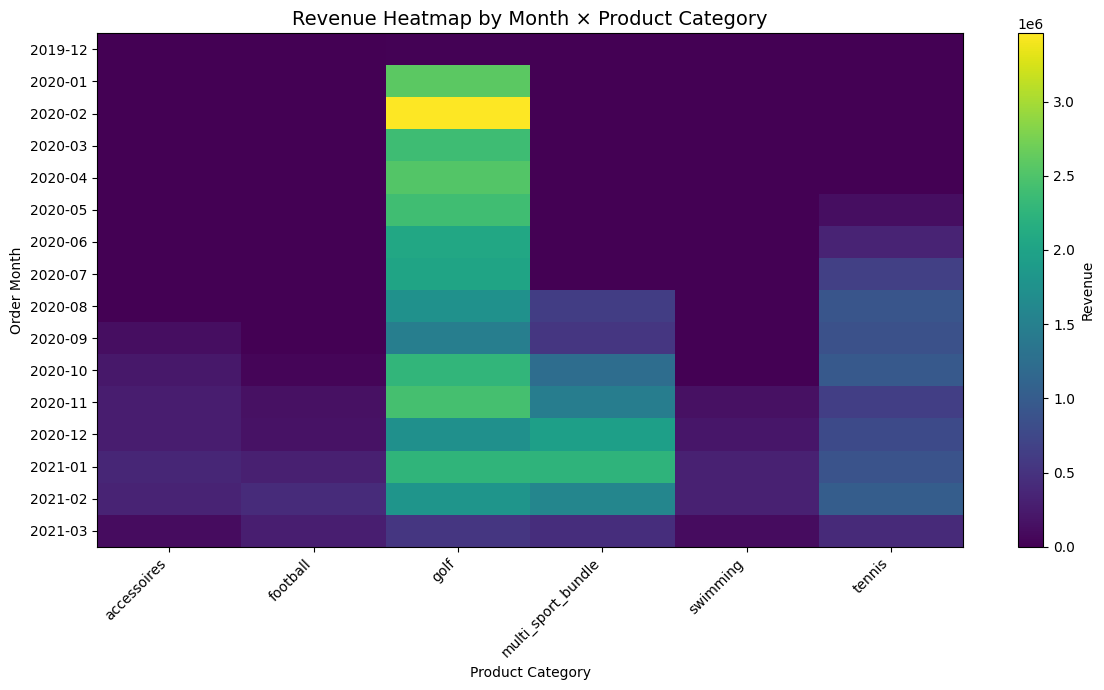

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ================================
# 1. LOAD DATA
# ================================
# ========= Load data =========
orders = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/orders_data.csv')
products = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/products_data.csv')

# Convert timestamps
orders['created_at'] = pd.to_datetime(orders['created_at'])
orders['order_month'] = orders['created_at'].dt.to_period('M')

# Deduplicate product table
products_dedup = products.drop_duplicates('product_title').copy()
products_dedup['product_title'] = products_dedup['product_title'].str.strip()

# ================================
# 2. EXPLODE PRODUCT LIST
# ================================
orders['product_list'] = orders['product_items'].str.split(', ')
orders_exploded = orders.explode('product_list')
orders_exploded['product_list'] = orders_exploded['product_list'].str.strip()

# Merge exploded order rows with product table
merged_ex = orders_exploded.merge(
    products_dedup,
    left_on='product_list',
    right_on='product_title',
    how='left'
)

# Revenue is product price
merged_ex['revenue'] = merged_ex['product_price']

# ================================
# 3. CREATE MONTH × CATEGORY PIVOT TABLE
# ================================
pivot = merged_ex.pivot_table(
    index='order_month',
    columns='product_category',
    values='revenue',
    aggfunc='sum'
).fillna(0)

# Ensure index strings for better plotting
pivot.index = pivot.index.astype(str)

# ================================
# 4. HEATMAP PLOT (MATPLOTLIB)
# ================================
plt.figure(figsize=(12, 7))

# Use imshow for clean heatmap rendering
plt.imshow(pivot.values, aspect='auto')

# Add colorbar
plt.colorbar(label='Revenue')

# Add ticks and labels
plt.xticks(
    ticks=np.arange(len(pivot.columns)),
    labels=pivot.columns,
    rotation=45,
    ha='right'
)
plt.yticks(
    ticks=np.arange(len(pivot.index)),
    labels=pivot.index
)

# Titles and labels
plt.title("Revenue Heatmap by Month × Product Category", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Order Month")

plt.tight_layout()
plt.show()


/tmp/ipykernel_1162295/2682687580.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders['order_month'] = orders['created_at'].dt.to_period('M')


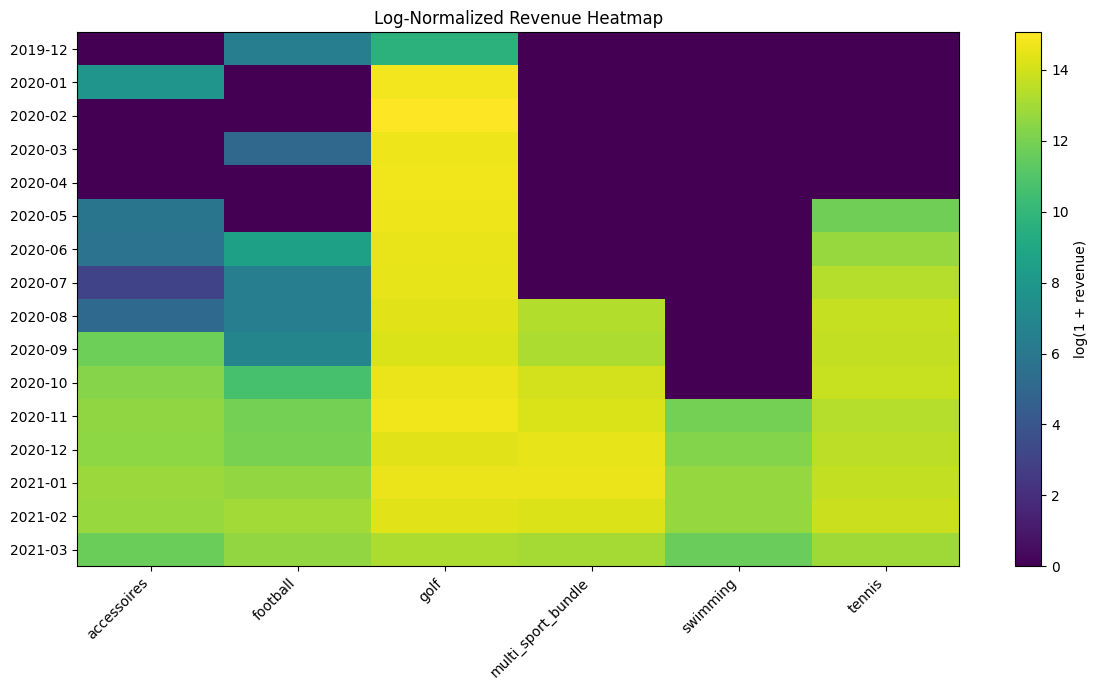

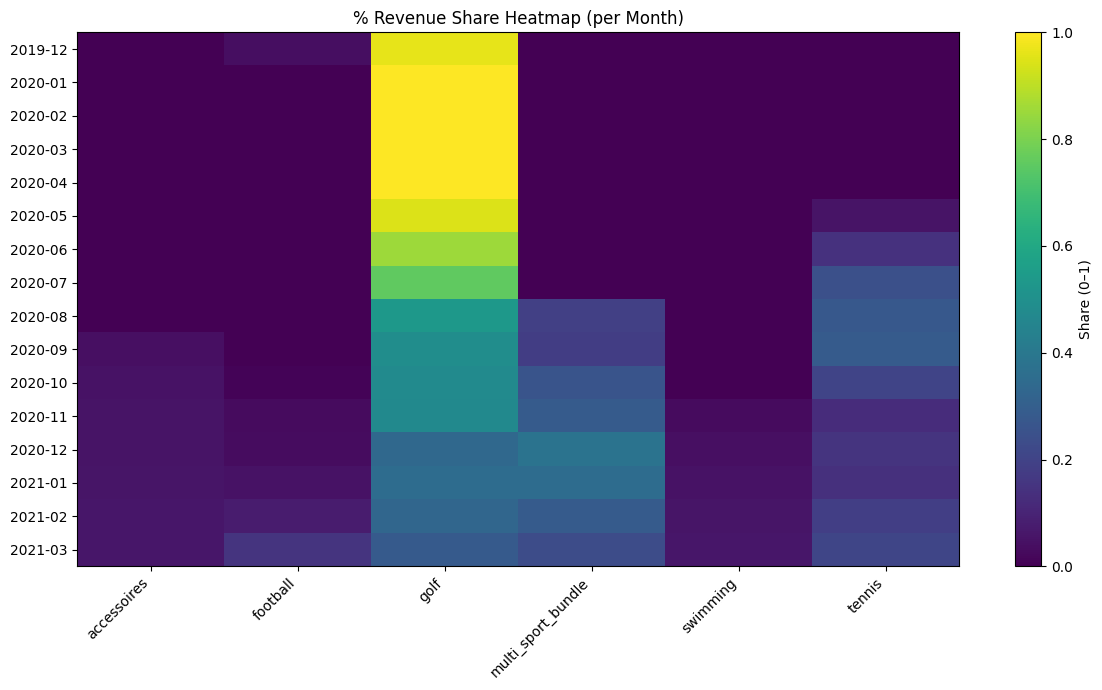

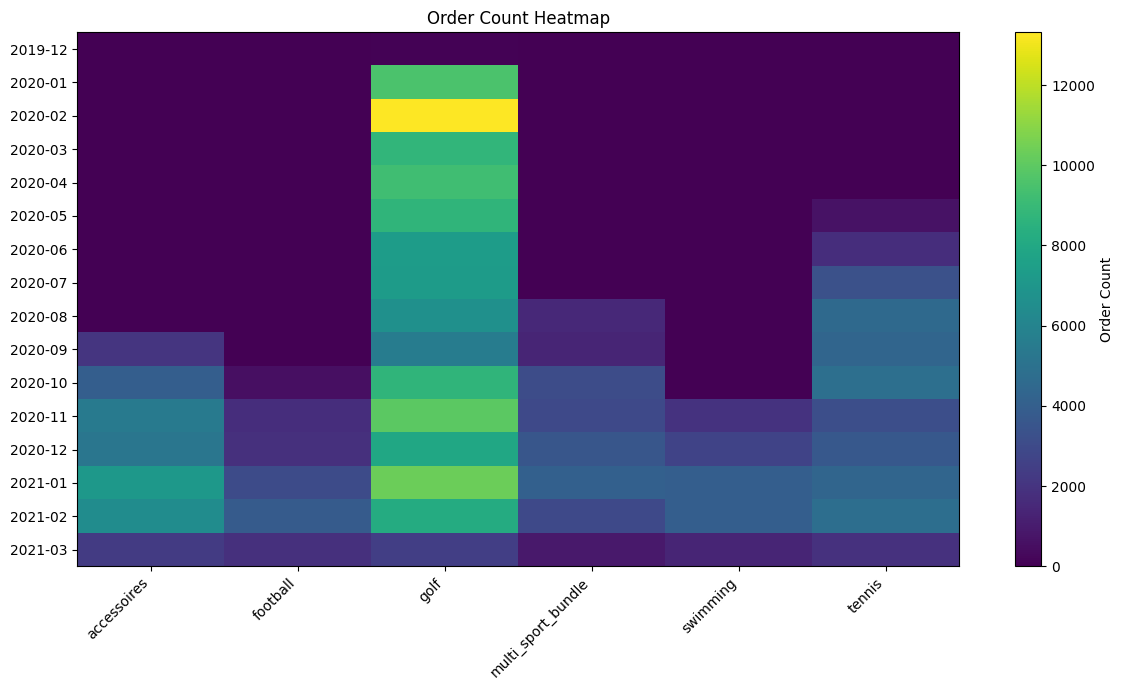

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ================================
# 1. LOAD & PREP DATA
# ================================
orders = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/orders_data.csv')
products = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/products_data.csv')

orders['created_at'] = pd.to_datetime(orders['created_at'])
orders['order_month'] = orders['created_at'].dt.to_period('M')

# Clean product table
products_dedup = products.drop_duplicates('product_title').copy()
products_dedup['product_title'] = products_dedup['product_title'].str.strip()

# Explode product list
orders['product_list'] = orders['product_items'].str.split(', ')
orders_exploded = orders.explode('product_list')
orders_exploded['product_list'] = orders_exploded['product_list'].str.strip()

# Merge with product info
merged_ex = orders_exploded.merge(
    products_dedup,
    left_on='product_list',
    right_on='product_title',
    how='left'
)

merged_ex['revenue'] = merged_ex['product_price']


# ================================
# 2. CREATE PIVOT TABLES
# ================================
# Revenue per month × category
rev_pivot = merged_ex.pivot_table(
    index='order_month',
    columns='product_category',
    values='revenue',
    aggfunc='sum'
).fillna(0)
rev_pivot.index = rev_pivot.index.astype(str)

# Log normalization
log_pivot = np.log1p(rev_pivot)

# % revenue share per month
share_pivot = rev_pivot.div(rev_pivot.sum(axis=1), axis=0).fillna(0)

# Order count pivot
count_pivot = (
    merged_ex.groupby(['order_month', 'product_category'])['order_number']
    .nunique()
    .unstack()
    .fillna(0)
)
count_pivot.index = count_pivot.index.astype(str)


# ================================
# 3. HEATMAP PLOTTING FUNCTION
# ================================
def plot_heatmap(data, title, cbar_label):
    plt.figure(figsize=(12, 7))
    plt.imshow(data.values, aspect='auto')
    plt.colorbar(label=cbar_label)
    plt.xticks(np.arange(len(data.columns)), data.columns, rotation=45, ha='right')
    plt.yticks(np.arange(len(data.index)), data.index)
    plt.title(title)
    plt.tight_layout()
    plt.show()


# ================================
# 4. GENERATE ALL HEATMAPS
# ================================
# 1. Log-normalized revenue heatmap
plot_heatmap(
    log_pivot,
    "Log-Normalized Revenue Heatmap",
    "log(1 + revenue)"
)

# 2. % Revenue share heatmap
plot_heatmap(
    share_pivot,
    "% Revenue Share Heatmap (per Month)",
    "Share (0–1)"
)

# 3. Order count heatmap
plot_heatmap(
    count_pivot,
    "Order Count Heatmap",
    "Order Count"
)


/tmp/ipykernel_1162295/2923370843.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders['order_month'] = orders['created_at'].dt.to_period('M')
/tmp/ipykernel_1162295/2923370843.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders['cohort_month'] = orders.groupby('customer_id')['created_at'].transform('min').dt.to_period('M')


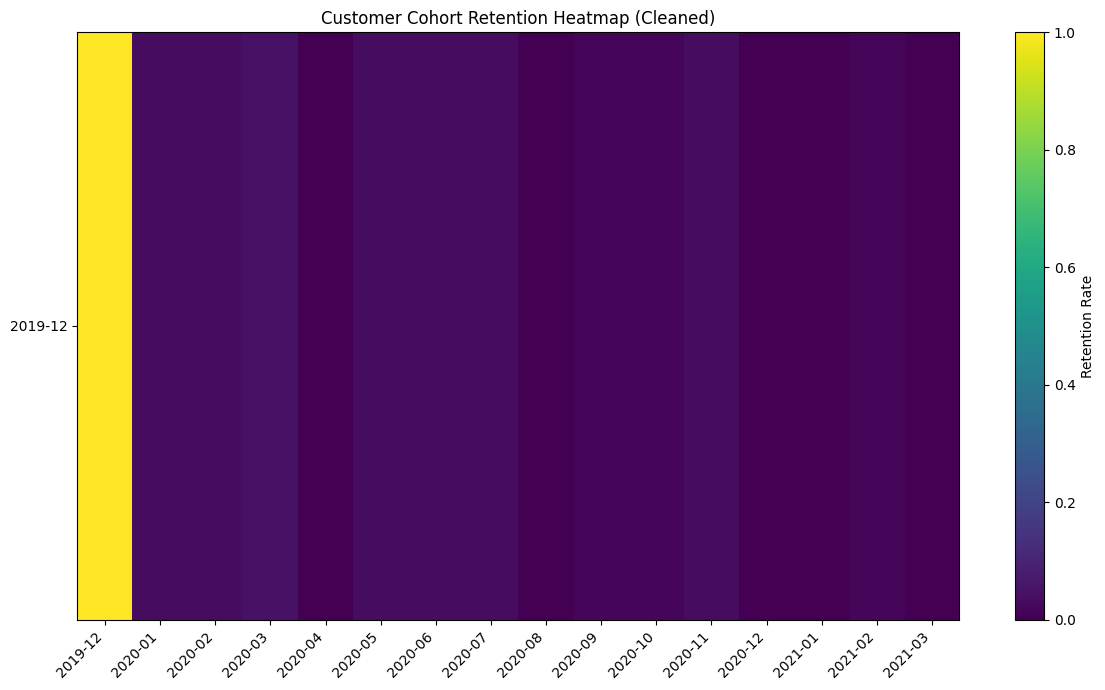

order_month,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
cohort_month,,,,,,,,,,,,,,,,
2019-12,1.0,0.033333,0.033333,0.05,0.0,0.033333,0.033333,0.033333,0.0,0.016667,0.016667,0.033333,0.0,0.0,0.016667,0.0


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
orders = pd.read_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/orders_data.csv')
orders['created_at'] = pd.to_datetime(orders['created_at'])
orders['order_month'] = orders['created_at'].dt.to_period('M')
orders['cohort_month'] = orders.groupby('customer_id')['created_at'].transform('min').dt.to_period('M')

# Pivot: number of active customers in each cohort × month
cohort = (
    orders.groupby(['cohort_month','order_month'])['customer_id']
    .nunique()
    .reset_index()
)

cohort_pivot = cohort.pivot(
    index='cohort_month',
    columns='order_month',
    values='customer_id'
).fillna(0)

# Only keep cohorts that actually have customers
cohort_sizes = cohort_pivot.iloc[:,0]
valid = cohort_sizes[cohort_sizes > 0].index
cohort_pivot = cohort_pivot.loc[valid]

# Calculate retention
retention = cohort_pivot.div(cohort_sizes.loc[valid], axis=0)

# Replace inf with NaN
retention = retention.replace([np.inf, -np.inf], np.nan)

# Keep only months on or after cohort start
filtered_retention = retention.copy()
for cohort_month in filtered_retention.index:
    filtered_retention.loc[cohort_month, filtered_retention.columns < cohort_month] = np.nan

# Convert PeriodIndex to string for plotting
filtered_retention.index = filtered_retention.index.astype(str)
filtered_retention.columns = filtered_retention.columns.astype(str)

# Plot heatmap
plt.figure(figsize=(12, 7))
plt.imshow(filtered_retention.values, aspect='auto')
plt.colorbar(label="Retention Rate")
plt.xticks(np.arange(len(filtered_retention.columns)), filtered_retention.columns, rotation=45, ha="right")
plt.yticks(np.arange(len(filtered_retention.index)), filtered_retention.index)
plt.title("Customer Cohort Retention Heatmap (Cleaned)")
plt.tight_layout()
plt.show()

filtered_retention


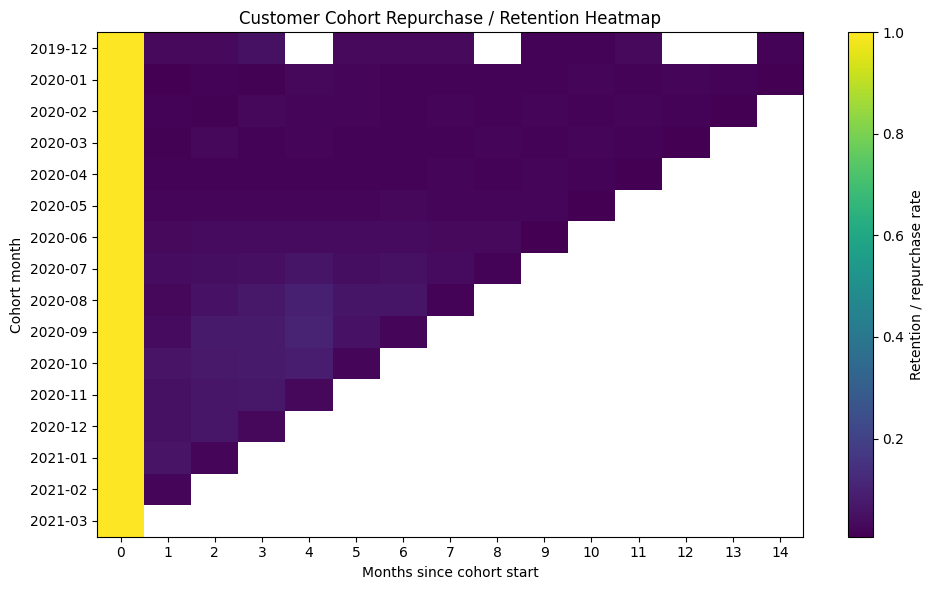

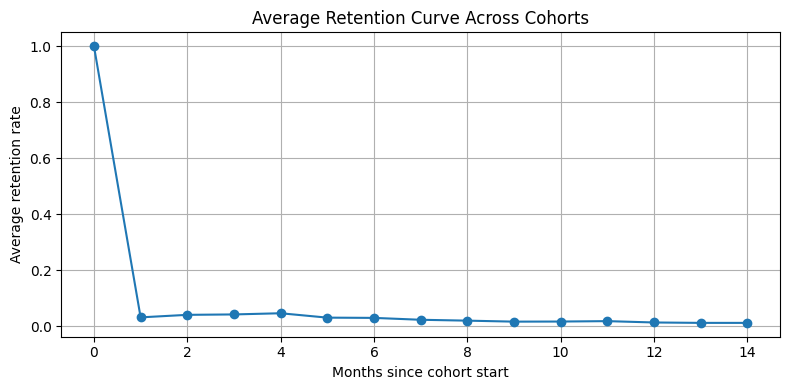

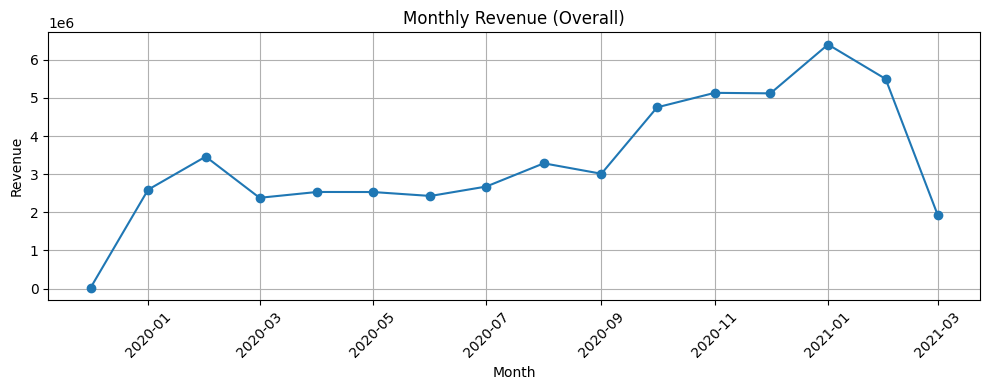

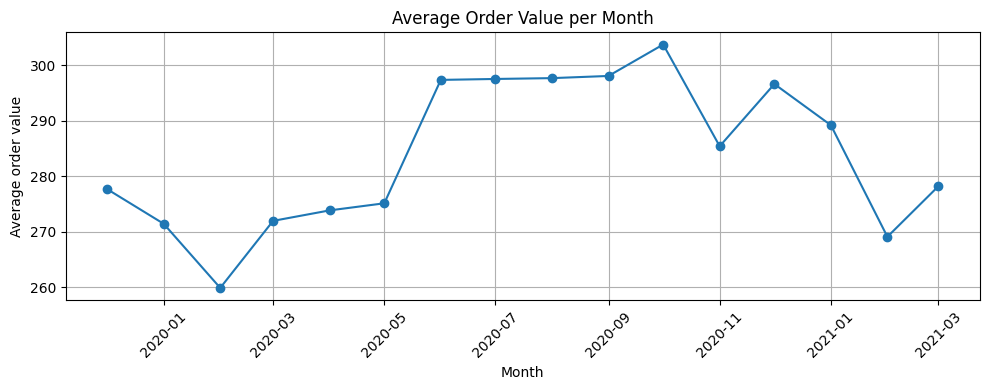

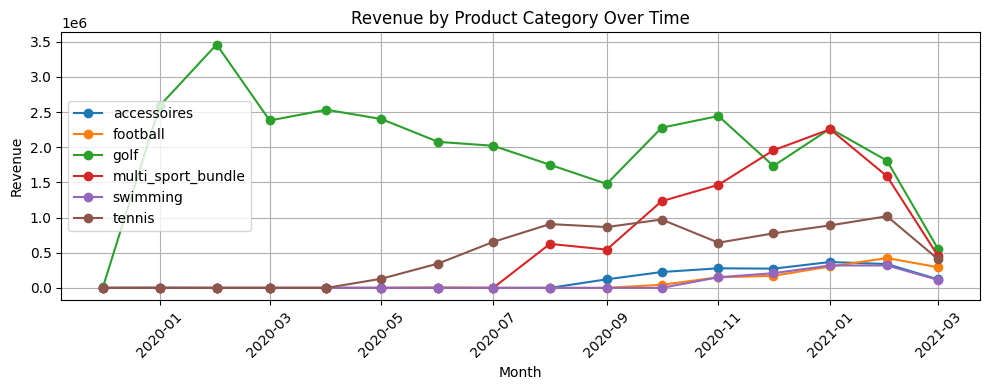

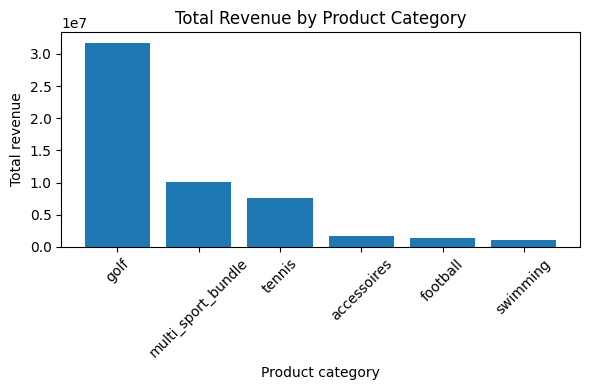

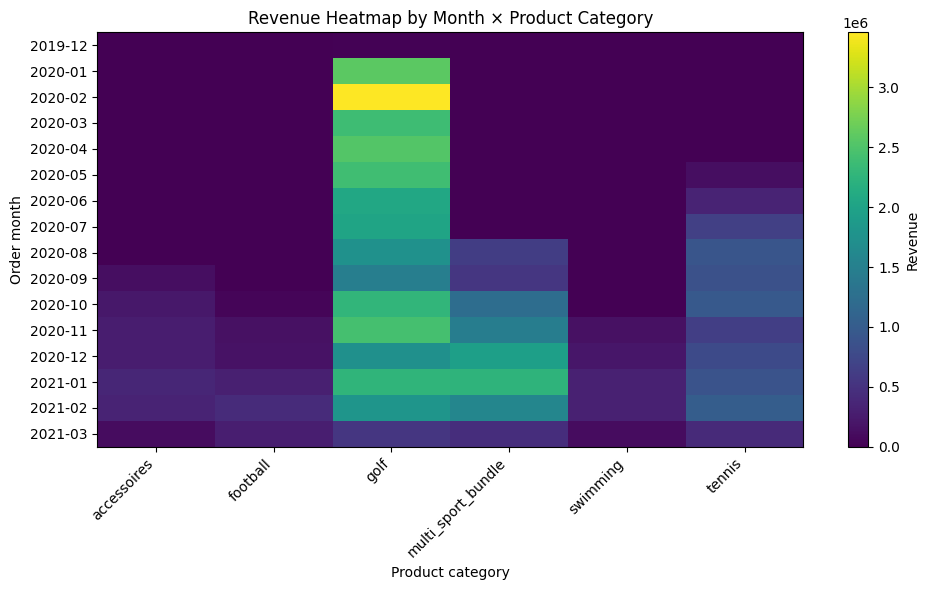

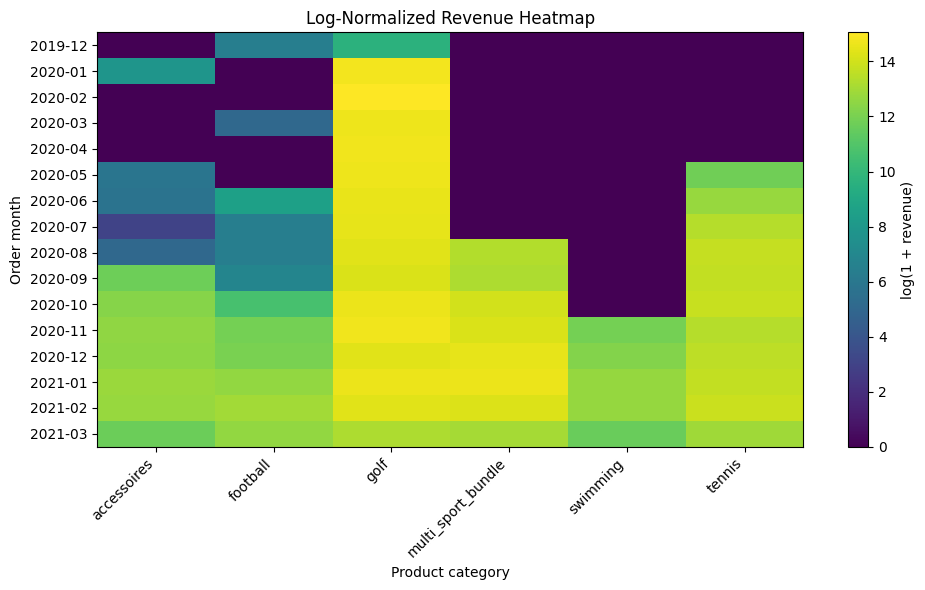

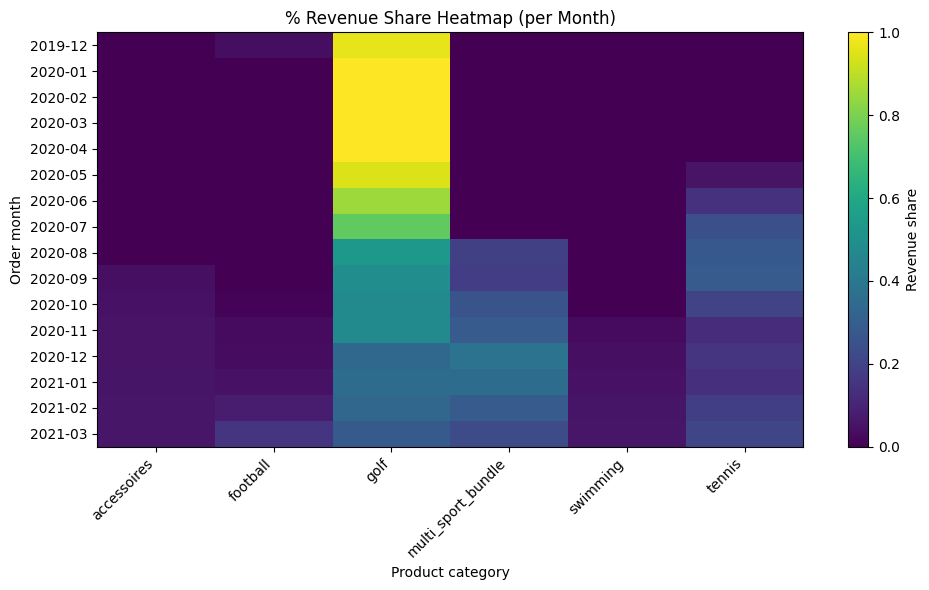

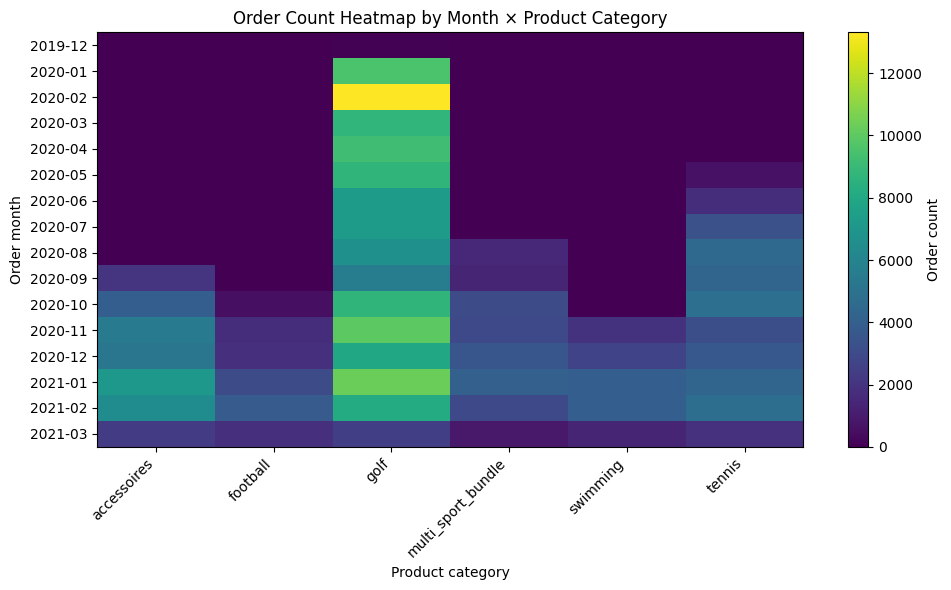

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# ---------------------------
# 1. LOAD DATA
# ---------------------------
orders = pd.read_csv("orders_data.csv")
products = pd.read_csv("products_data.csv")


# ---------------------------
# 2. PREP & ENRICH PRODUCTS
# ---------------------------
# Some product_titles appear multiple times – aggregate to one row per title.
prod_agg = (
    products
    .groupby("product_title", as_index=False)
    .agg(
        product_price=("product_price", "mean"),
        product_type=("product_type", "first"),
        product_category=("product_category", "first"),
    )
)


# ---------------------------
# 3. BUILD ORDER–ITEM TABLE
# ---------------------------
# Each order can contain multiple product titles in product_items, separated by ", ".
base_cols = [
    "order_number",
    "customer_id",
    "billing_address_country",
    "billing_address_zip",
    "total_discounts",
    "cancel_reason",
    "processed_at",
    "total_weight",
    "cancelled_at",
    "created_at",
    "first_date_order",
    "product_items",
]

items = orders[base_cols].copy()
items["item_title"] = items["product_items"].str.split(", ")
items = items.explode("item_title")
items["item_title"] = items["item_title"].str.strip()

# Join to products (now every row is one line item)
items_merged = items.merge(
    prod_agg,
    left_on="item_title",
    right_on="product_title",
    how="left",
)

assert items_merged["product_price"].isna().sum() == 0, "Some items did not match products!"


# ---------------------------
# 4. DATE HANDLING & REVENUE
# ---------------------------
def parse_utc_series(s: pd.Series) -> pd.Series:
    # Original strings look like "2020-01-01 12:34:56 UTC"
    return pd.to_datetime(s.str.replace(" UTC", "", regex=False))


items_merged["order_datetime"] = parse_utc_series(items_merged["created_at"])
items_merged["order_month"] = (
    items_merged["order_datetime"].dt.to_period("M").dt.to_timestamp()
)

items_merged["first_order_datetime"] = parse_utc_series(
    items_merged["first_date_order"]
)
items_merged["cohort_month"] = (
    items_merged["first_order_datetime"].dt.to_period("M").dt.to_timestamp()
)

# Allocate order-level discounts evenly across all items in that order
items_merged["items_per_order"] = (
    items_merged.groupby("order_number")["item_title"].transform("count")
)
items_merged["discount_per_item"] = (
    items_merged["total_discounts"] / items_merged["items_per_order"]
)

# Line revenue per item
items_merged["line_revenue"] = (
    items_merged["product_price"] - items_merged["discount_per_item"]
)


# ---------------------------
# 5. ORDER-LEVEL TABLE (for AOV & cohorts)
# ---------------------------
order_level = (
    items_merged
    .groupby("order_number")
    .agg(
        customer_id=("customer_id", "first"),
        order_month=("order_month", "first"),
        cohort_month=("cohort_month", "first"),
        order_revenue=("line_revenue", "sum"),
    )
    .reset_index()
)

# Months since cohort start (integer)
order_level["period_index"] = (
    (order_level["order_month"].dt.year - order_level["cohort_month"].dt.year) * 12
    + (order_level["order_month"].dt.month - order_level["cohort_month"].dt.month)
)


# ---------------------------
# 6. COHORT RETENTION / REPURCHASE
# ---------------------------

# Cohort sizes (unique customers per cohort month)
cohort_sizes = (
    order_level
    .groupby("cohort_month")["customer_id"]
    .nunique()
    .rename("cohort_size")
)

# Active customers per (cohort_month, period_index)
cohort_data = (
    order_level
    .groupby(["cohort_month", "period_index"])["customer_id"]
    .nunique()
    .reset_index(name="active_customers")
    .merge(cohort_sizes, on="cohort_month")
)

cohort_data["retention_rate"] = (
    cohort_data["active_customers"] / cohort_data["cohort_size"]
)

# Matrix: rows = cohort month, cols = months since cohort start
retention_matrix = (
    cohort_data
    .pivot_table(
        index="cohort_month",
        columns="period_index",
        values="retention_rate",
    )
    .sort_index()
)

# ---------------------------
# 6.1 Customer Cohort Repurchase / Retention Heatmap
# ---------------------------
plt.figure(figsize=(10, 6))
plt.imshow(retention_matrix.values, aspect="auto")
plt.colorbar(label="Retention / repurchase rate")
plt.yticks(
    ticks=np.arange(len(retention_matrix.index)),
    labels=[d.strftime("%Y-%m") for d in retention_matrix.index],
)
plt.xticks(
    ticks=np.arange(len(retention_matrix.columns)),
    labels=retention_matrix.columns,
)
plt.xlabel("Months since cohort start")
plt.ylabel("Cohort month")
plt.title("Customer Cohort Repurchase / Retention Heatmap")
plt.tight_layout()
plt.show()


# ---------------------------
# 6.2 Average Retention Curve Across Cohorts
# ---------------------------
avg_retention = retention_matrix.mean(axis=0)

plt.figure(figsize=(8, 4))
plt.plot(avg_retention.index, avg_retention.values, marker="o")
plt.xlabel("Months since cohort start")
plt.ylabel("Average retention rate")
plt.title("Average Retention Curve Across Cohorts")
plt.grid(True)
plt.tight_layout()
plt.show()


# ---------------------------
# 7. MONTHLY REVENUE & AOV
# ---------------------------

# 7.1 Monthly Revenue (overall / “product-based”)
monthly_revenue = (
    order_level
    .groupby("order_month")["order_revenue"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10, 4))
plt.plot(
    monthly_revenue["order_month"],
    monthly_revenue["order_revenue"],
    marker="o",
)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Revenue (Overall)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 7.2 Average Order Value per Month
monthly_aov = (
    order_level
    .groupby("order_month")["order_revenue"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 4))
plt.plot(
    monthly_aov["order_month"],
    monthly_aov["order_revenue"],
    marker="o",
)
plt.xlabel("Month")
plt.ylabel("Average order value")
plt.title("Average Order Value per Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# ---------------------------
# 8. CATEGORY-LEVEL REVENUE
# ---------------------------

# Monthly revenue per product category
monthly_cat_revenue = (
    items_merged
    .groupby(["order_month", "product_category"])["line_revenue"]
    .sum()
    .reset_index()
)

pivot_cat_rev = (
    monthly_cat_revenue
    .pivot(index="order_month", columns="product_category", values="line_revenue")
    .fillna(0.0)
    .sort_index()
)

# 8.1 Revenue by Product Category over Time
plt.figure(figsize=(10, 4))
for cat in pivot_cat_rev.columns:
    plt.plot(pivot_cat_rev.index, pivot_cat_rev[cat], marker="o", label=str(cat))
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Revenue by Product Category Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8.2 Total Revenue by Product Category
total_cat_revenue = (
    items_merged
    .groupby("product_category")["line_revenue"]
    .sum()
    .reset_index()
    .sort_values("line_revenue", ascending=False)
)

plt.figure(figsize=(6, 4))
plt.bar(total_cat_revenue["product_category"], total_cat_revenue["line_revenue"])
plt.xlabel("Product category")
plt.ylabel("Total revenue")
plt.title("Total Revenue by Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ---------------------------
# 9. HEATMAPS: REVENUE & ORDERS BY MONTH × CATEGORY
# ---------------------------
months = [d.strftime("%Y-%m") for d in pivot_cat_rev.index]
cats = list(pivot_cat_rev.columns)

# 9.1 Revenue Heatmap by Month × Product Category
plt.figure(figsize=(10, 6))
plt.imshow(pivot_cat_rev.values, aspect="auto")
plt.colorbar(label="Revenue")
plt.yticks(ticks=np.arange(len(months)), labels=months)
plt.xticks(ticks=np.arange(len(cats)), labels=cats, rotation=45, ha="right")
plt.xlabel("Product category")
plt.ylabel("Order month")
plt.title("Revenue Heatmap by Month × Product Category")
plt.tight_layout()
plt.show()

# 9.2 Log-Normalized Revenue Heatmap
log_pivot = np.log1p(pivot_cat_rev.values)

plt.figure(figsize=(10, 6))
plt.imshow(log_pivot, aspect="auto")
plt.colorbar(label="log(1 + revenue)")
plt.yticks(ticks=np.arange(len(months)), labels=months)
plt.xticks(ticks=np.arange(len(cats)), labels=cats, rotation=45, ha="right")
plt.xlabel("Product category")
plt.ylabel("Order month")
plt.title("Log-Normalized Revenue Heatmap")
plt.tight_layout()
plt.show()

# 9.3 % Revenue Share Heatmap (per Month)
share_pivot = pivot_cat_rev.div(pivot_cat_rev.sum(axis=1), axis=0).fillna(0.0)

plt.figure(figsize=(10, 6))
plt.imshow(share_pivot.values, aspect="auto")
plt.colorbar(label="Revenue share")
plt.yticks(ticks=np.arange(len(months)), labels=months)
plt.xticks(ticks=np.arange(len(cats)), labels=cats, rotation=45, ha="right")
plt.xlabel("Product category")
plt.ylabel("Order month")
plt.title("% Revenue Share Heatmap (per Month)")
plt.tight_layout()
plt.show()

# 9.4 Order Count Heatmap (Month × Product Category)
monthly_cat_orders = (
    items_merged
    .groupby(["order_month", "product_category"])["order_number"]
    .nunique()
    .unstack("product_category")
    .fillna(0.0)
    .sort_index()
)

months2 = [d.strftime("%Y-%m") for d in monthly_cat_orders.index]
cats2 = list(monthly_cat_orders.columns)

plt.figure(figsize=(10, 6))
plt.imshow(monthly_cat_orders.values, aspect="auto")
plt.colorbar(label="Order count")
plt.yticks(ticks=np.arange(len(months2)), labels=months2)
plt.xticks(ticks=np.arange(len(cats2)), labels=cats2, rotation=45, ha="right")
plt.xlabel("Product category")
plt.ylabel("Order month")
plt.title("Order Count Heatmap by Month × Product Category")
plt.tight_layout()
plt.show()


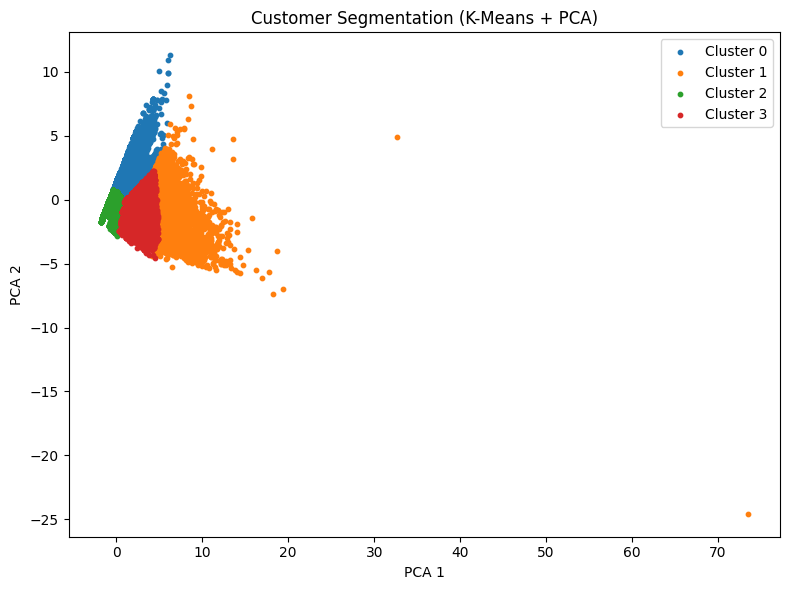

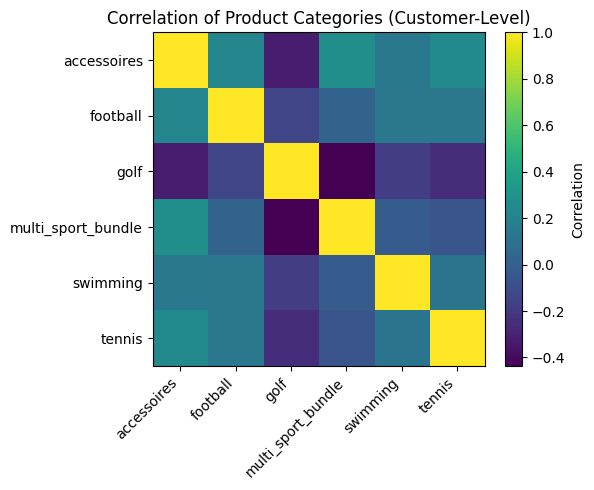

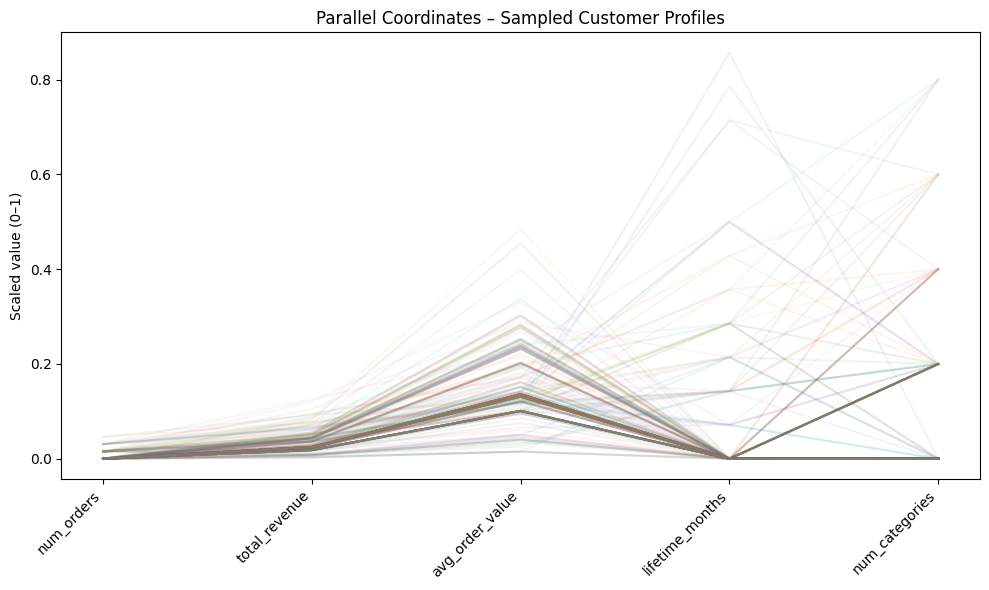

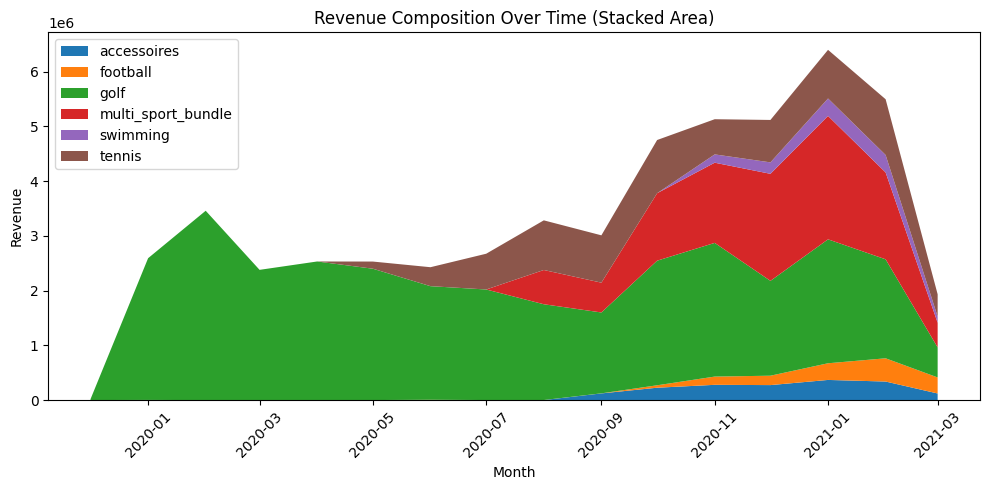

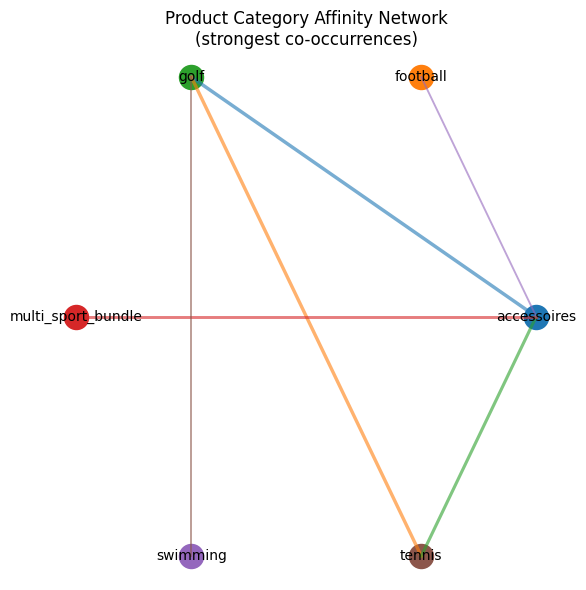

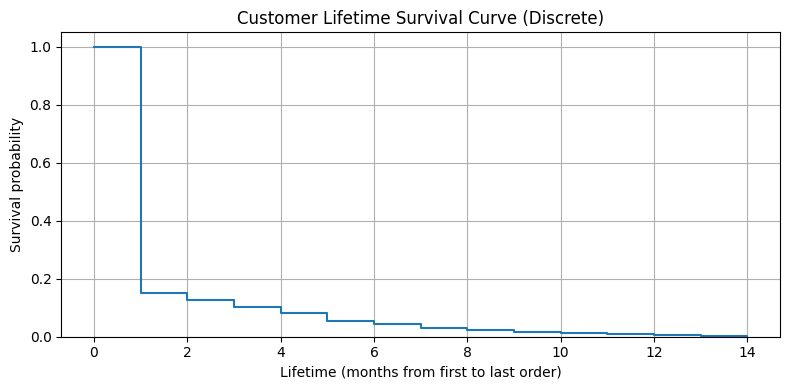

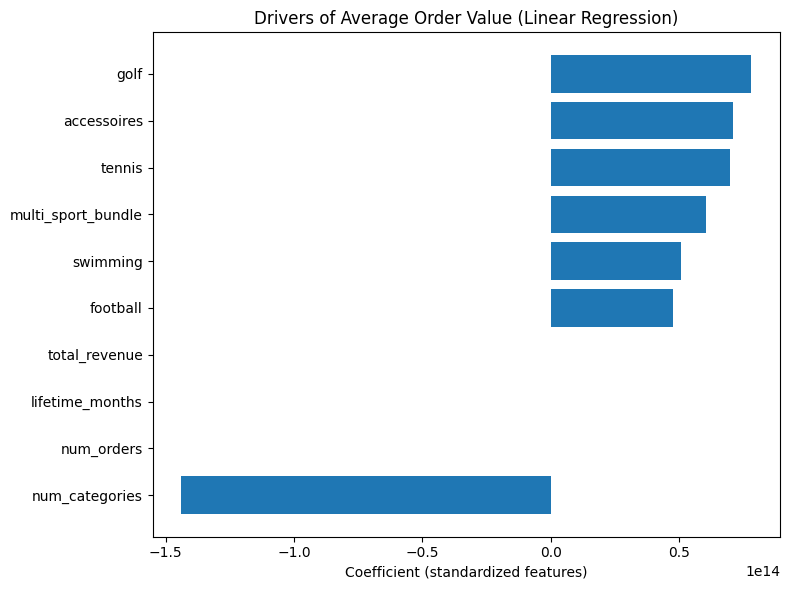

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import combinations
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression


# ============================================================
# 1. LOAD & PREP DATA
# ============================================================

orders = pd.read_csv("orders_data.csv")
products = pd.read_csv("products_data.csv")

# Aggregate products by title (some titles appear multiple times)
prod_agg = (
    products
    .groupby("product_title", as_index=False)
    .agg(
        product_price=("product_price", "mean"),
        product_type=("product_type", "first"),
        product_category=("product_category", "first"),
    )
)

# Explode orders into one row per item_title
base_cols = [
    "order_number",
    "customer_id",
    "billing_address_country",
    "billing_address_zip",
    "total_discounts",
    "cancel_reason",
    "processed_at",
    "total_weight",
    "cancelled_at",
    "created_at",
    "first_date_order",
    "product_items",
]

items = orders[base_cols].copy()
items["item_title"] = items["product_items"].str.split(", ")
items = items.explode("item_title")
items["item_title"] = items["item_title"].str.strip()

items_merged = items.merge(
    prod_agg,
    left_on="item_title",
    right_on="product_title",
    how="left",
)

if items_merged["product_price"].isna().sum() > 0:
    raise ValueError("Some product items could not be matched to products_data.csv")

# --- Date parsing helpers ---
def parse_utc_series(s: pd.Series) -> pd.Series:
    # e.g. "2020-01-01 10:00:00 UTC"
    return pd.to_datetime(s.str.replace(" UTC", "", regex=False))

items_merged["order_datetime"] = parse_utc_series(items_merged["created_at"])
items_merged["order_month"] = (
    items_merged["order_datetime"].dt.to_period("M").dt.to_timestamp()
)

items_merged["first_order_datetime"] = parse_utc_series(
    items_merged["first_date_order"]
)
items_merged["cohort_month"] = (
    items_merged["first_order_datetime"].dt.to_period("M").dt.to_timestamp()
)

# --- Revenue per line item (discounts apportioned evenly within order) ---
items_merged["items_per_order"] = (
    items_merged.groupby("order_number")["item_title"].transform("count")
)
items_merged["discount_per_item"] = (
    items_merged["total_discounts"] / items_merged["items_per_order"]
)
items_merged["line_revenue"] = (
    items_merged["product_price"] - items_merged["discount_per_item"]
)

# ============================================================
# 2. ORDER-LEVEL AND CUSTOMER-LEVEL TABLES
# ============================================================

order_level = (
    items_merged
    .groupby("order_number")
    .agg(
        customer_id=("customer_id", "first"),
        order_month=("order_month", "first"),
        cohort_month=("cohort_month", "first"),
        order_revenue=("line_revenue", "sum"),
    )
    .reset_index()
)

order_level["period_index"] = (
    (order_level["order_month"].dt.year - order_level["cohort_month"].dt.year) * 12
    + (order_level["order_month"].dt.month - order_level["cohort_month"].dt.month)
)

# --- Customer-level aggregate ---
cust_agg = (
    order_level
    .groupby("customer_id")
    .agg(
        first_order=("order_month", "min"),
        last_order=("order_month", "max"),
        num_orders=("order_number", "nunique"),
        total_revenue=("order_revenue", "sum"),
        avg_order_value=("order_revenue", "mean"),
    )
)

# Lifetime in months from first to last order
cust_agg["lifetime_months"] = (
    (cust_agg["last_order"].dt.year - cust_agg["first_order"].dt.year) * 12
    + (cust_agg["last_order"].dt.month - cust_agg["first_order"].dt.month)
).astype(int)

# Category participation per customer (binary indicators)
cust_cat = (
    items_merged
    .groupby(["customer_id", "product_category"])["order_number"]
    .nunique()
    .reset_index()
)
cust_cat["has_cat"] = 1
cust_cat_pivot = cust_cat.pivot_table(
    index="customer_id",
    columns="product_category",
    values="has_cat",
    fill_value=0,
)

cust_agg = cust_agg.join(cust_cat_pivot, how="left")
cust_agg["num_categories"] = cust_cat_pivot.sum(axis=1)
cust_agg = cust_agg.fillna(0)

cat_cols = list(cust_cat_pivot.columns)

# Base features for clustering / parallel coords / regression
cluster_features = cust_agg[
    ["num_orders", "total_revenue", "avg_order_value", "lifetime_months", "num_categories"]
].copy()

# ============================================================
# 3. CUSTOMER CLUSTERING (K-Means) + PCA SCATTER
# ============================================================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_features)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
cust_agg["cluster"] = clusters

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for cl in np.unique(clusters):
    mask = clusters == cl
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], s=10, label=f"Cluster {cl}")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Customer Segmentation (K-Means + PCA)")
plt.legend()
plt.tight_layout()
plt.show()

# ============================================================
# 4. PRODUCT CATEGORY CORRELATION HEATMAP (CUSTOMER LEVEL)
# ============================================================

cat_matrix = cust_cat_pivot[cat_cols].astype(float)
corr_matrix = cat_matrix.corr()

plt.figure(figsize=(6, 5))
plt.imshow(corr_matrix.values, aspect="auto")
plt.colorbar(label="Correlation")
plt.xticks(
    ticks=np.arange(len(cat_cols)),
    labels=cat_cols,
    rotation=45,
    ha="right",
)
plt.yticks(
    ticks=np.arange(len(cat_cols)),
    labels=cat_cols,
)
plt.title("Correlation of Product Categories (Customer-Level)")
plt.tight_layout()
plt.show()

# ============================================================
# 5. PARALLEL COORDINATES PLOT – CUSTOMER PROFILES
# ============================================================

# Scale each feature to [0,1] for plotting
parallel_features = cluster_features.copy()
parallel_features = (
    (parallel_features - parallel_features.min())
    / (parallel_features.max() - parallel_features.min())
)
parallel_features["cluster"] = clusters

# Sample to avoid overplotting
sample_size = min(300, len(parallel_features))
sampled = parallel_features.sample(sample_size, random_state=42)

feature_names = ["num_orders", "total_revenue", "avg_order_value",
                 "lifetime_months", "num_categories"]

plt.figure(figsize=(10, 6))
x = range(len(feature_names))
for _, row in sampled.iterrows():
    plt.plot(x, row[feature_names].values, alpha=0.08)
plt.xticks(x, feature_names, rotation=45, ha="right")
plt.ylabel("Scaled value (0–1)")
plt.title("Parallel Coordinates – Sampled Customer Profiles")
plt.tight_layout()
plt.show()

# ============================================================
# 6. STACKED AREA – REVENUE COMPOSITION OVER TIME
# ============================================================

monthly_cat_revenue = (
    items_merged
    .groupby(["order_month", "product_category"])["line_revenue"]
    .sum()
    .reset_index()
)

rev_pivot = (
    monthly_cat_revenue
    .pivot(index="order_month", columns="product_category", values="line_revenue")
    .fillna(0.0)
    .sort_index()
)

months = rev_pivot.index
categories = rev_pivot.columns
values = rev_pivot.values.T  # (n_categories, n_months)

plt.figure(figsize=(10, 5))
plt.stackplot(months, values, labels=categories)
plt.legend(loc="upper left")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Revenue Composition Over Time (Stacked Area)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================================
# 7. PRODUCT AFFINITY NETWORK (CATEGORY LEVEL)
# ============================================================

# Co-occurrence of categories within each order
order_cat = (
    items_merged
    .groupby(["order_number", "product_category"])["item_title"]
    .nunique()
    .reset_index()
)

order_cat_list = (
    order_cat
    .groupby("order_number")["product_category"]
    .apply(list)
)

pair_counter = Counter()
for cat_list in order_cat_list:
    unique_cats = sorted(set(cat_list))
    for a, b in combinations(unique_cats, 2):
        pair_counter[(a, b)] += 1

if pair_counter:
    pairs, weights_arr = zip(*pair_counter.items())
    weights_arr = np.array(weights_arr)

    # Keep stronger pairs (e.g. top 40% by weight)
    threshold = np.percentile(weights_arr, 60)
    filtered = [(p, w) for p, w in pair_counter.items() if w >= threshold]

    filtered_pairs = [p for p, _ in filtered]
    filtered_weights = [w for _, w in filtered]

    unique_cats_net = sorted(
        set([p[0] for p in filtered_pairs] + [p[1] for p in filtered_pairs])
    )
    n_nodes = len(unique_cats_net)
    angles = np.linspace(0, 2 * np.pi, n_nodes, endpoint=False)
    pos = {cat: (np.cos(a), np.sin(a))
           for cat, a in zip(unique_cats_net, angles)}

    plt.figure(figsize=(6, 6))

    # Draw edges
    max_w = max(filtered_weights)
    for (a, b), w in zip(filtered_pairs, filtered_weights):
        x_vals = [pos[a][0], pos[b][0]]
        y_vals = [pos[a][1], pos[b][1]]
        plt.plot(x_vals, y_vals, linewidth=0.5 + 2 * (w / max_w), alpha=0.6)

    # Draw nodes & labels
    for cat in unique_cats_net:
        x, y = pos[cat]
        plt.scatter(x, y, s=300)
        plt.text(x, y, cat, ha="center", va="center")

    plt.axis("off")
    plt.title("Product Category Affinity Network\n(strongest co-occurrences)")
    plt.tight_layout()
    plt.show()

# ============================================================
# 8. CUSTOMER LIFETIME SURVIVAL CURVE (DISCRETE KM)
# ============================================================

lifetimes = cust_agg["lifetime_months"].astype(int)
max_t = lifetimes.max()
times = np.arange(0, max_t + 1)
n_customers = len(lifetimes)

survival = []
for t in times:
    survival.append((lifetimes >= t).sum() / n_customers)

plt.figure(figsize=(8, 4))
plt.step(times, survival, where="post")
plt.xlabel("Lifetime (months from first to last order)")
plt.ylabel("Survival probability")
plt.title("Customer Lifetime Survival Curve (Discrete)")
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================================================
# 9. MULTIVARIATE REGRESSION – DRIVERS OF AOV
# ============================================================

reg_features = cust_agg[
    ["num_orders", "total_revenue", "lifetime_months", "num_categories"] + cat_cols
].copy()
target = cust_agg["avg_order_value"].values

scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(reg_features)

reg = LinearRegression()
reg.fit(X_reg_scaled, target)
coefs = reg.coef_

coef_series = pd.Series(coefs, index=reg_features.columns).sort_values()

plt.figure(figsize=(8, 6))
plt.barh(coef_series.index, coef_series.values)
plt.xlabel("Coefficient (standardized features)")
plt.title("Drivers of Average Order Value (Linear Regression)")
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import networkx as nx
from itertools import combinations
from pandas.plotting import parallel_coordinates

plt.style.use("ggplot")

# ============================================================
# 1. Load data
# ============================================================
orders = pd.read_csv("orders_data.csv")
products = pd.read_csv("products_data.csv")

# ============================================================
# 2. Basic EDA + cleaning
# ============================================================
print("=== ORDERS HEAD ===")
print(orders.head())
print("\n=== PRODUCTS HEAD ===")
print(products.head())

print("\n=== ORDERS INFO ===")
print(orders.info())
print("\n=== PRODUCTS INFO ===")
print(products.info())

print("\n=== ORDERS NULLS ===")
print(orders.isna().sum())
print("\n=== PRODUCTS NULLS ===")
print(products.isna().sum())

# Deduplicate products by title (some titles appear multiple times)
products_unique = products.drop_duplicates(subset=["product_title"]).copy()

# Parse date columns in orders (strip ' UTC' and convert to datetime)
date_cols = ["processed_at", "created_at", "cancelled_at", "first_date_order"]
for col in date_cols:
    if col in orders.columns:
        orders[col] = pd.to_datetime(
            orders[col].str.replace(" UTC", "", regex=False),
            errors="coerce"
        )

# Create order_date and order_month (normalized to first day of month)
orders["order_date"] = pd.to_datetime(orders["processed_at"].dt.date)
orders["order_month"] = orders["order_date"].values.astype("datetime64[M]")

# Basic date sanity checks
print("\nOrder date range:", orders["order_date"].min(), "->", orders["order_date"].max())
print("Order month range:", orders["order_month"].min(), "->", orders["order_month"].max())

# ============================================================
# 3. Feature engineering: order-lines + revenue
# ============================================================
# Lookup table for product info
product_lookup = (
    products_unique
    .set_index("product_title")[["product_price", "product_category", "product_type"]]
)

def explode_order_products(df_orders: pd.DataFrame,
                           lookup: pd.DataFrame) -> pd.DataFrame:
    """
    Expand orders into one row per product line item.
    product_items is a comma-separated list of product_title.
    """
    records = []
    for _, row in df_orders.iterrows():
        items = [s.strip() for s in str(row["product_items"]).split(",")]
        for title in items:
            if title in lookup.index:
                rec = lookup.loc[title]
                price = rec["product_price"]
                category = rec["product_category"]
                ptype = rec["product_type"]
            else:
                # In case a title is missing in products table
                price = np.nan
                category = None
                ptype = None

            records.append(
                {
                    "order_number": row["order_number"],
                    "customer_id": row["customer_id"],
                    "order_date": row["order_date"],
                    "order_month": row["order_month"],
                    "product_title": title,
                    "product_price": price,
                    "product_category": category,
                    "product_type": ptype,
                }
            )
    return pd.DataFrame(records)

order_lines = explode_order_products(orders, product_lookup)

print("\n=== ORDER LINES HEAD ===")
print(order_lines.head())
print("\n=== ORDER LINES NULLS ===")
print(order_lines.isna().sum())

# Order-level revenue
order_revenue = (
    order_lines
    .groupby("order_number")["product_price"]
    .sum()
    .rename("order_revenue")
)

orders = orders.merge(order_revenue, on="order_number", how="left")

print("\nOrder revenue summary:")
print(orders["order_revenue"].describe())

# ============================================================
# 4. Cohort setup (Customer Retention Cohort Analysis)
# ============================================================
# Cohort = first order month per customer
orders["cohort_month"] = (
    orders.groupby("customer_id")["order_month"]
    .transform("min")
)

def get_month_diff(d1: pd.Series, d2: pd.Series) -> pd.Series:
    """Difference in months between two Timestamps (d1 - d2)."""
    return (d1.dt.year - d2.dt.year) * 12 + (d1.dt.month - d2.dt.month)

# Cohort index (0,1,2,... months since first order)
orders["cohort_index"] = get_month_diff(orders["order_month"], orders["cohort_month"])

# One row per customer + month for cohort calculations
cohort_data = (
    orders[["customer_id", "cohort_month", "order_month", "cohort_index"]]
    .drop_duplicates()
)

# Cohort sizes (customers in period 0)
cohort_sizes = (
    cohort_data[cohort_data["cohort_index"] == 0]
    .groupby("cohort_month")["customer_id"]
    .nunique()
    .rename("cohort_size")
)

# Retention counts by cohort & period
retention_counts = (
    cohort_data
    .groupby(["cohort_month", "cohort_index"])["customer_id"]
    .nunique()
    .rename("n_customers")
    .reset_index()
)

# Add cohort sizes and compute retention rate
retention = retention_counts.merge(cohort_sizes, on="cohort_month", how="left")
retention["retention_rate"] = retention["n_customers"] / retention["cohort_size"]

# Retention matrix for heatmap: cohorts x months since first order
retention_pivot = retention.pivot_table(
    index="cohort_month",
    columns="cohort_index",
    values="retention_rate"
)

print("\n=== Cohort Retention Matrix (head) ===")
print(retention_pivot.head())

# ----------------   Customer Cohort Purchase Count   ----------------
orders_per_customer = (
    orders
    .groupby(["customer_id", "cohort_month", "cohort_index"])["order_number"]
    .nunique()
    .reset_index(name="n_orders")
)

cohort_purchase = (
    orders_per_customer
    .groupby(["cohort_month", "cohort_index"])["n_orders"]
    .mean()
    .rename("avg_orders_per_customer")
    .unstack("cohort_index")
)

print("\n=== Cohort Purchase Count (avg orders per customer) ===")
print(cohort_purchase.head())

# ----------------   Average Retention Curve Across Cohorts   ----------------
avg_retention_curve = (
    retention
    .groupby("cohort_index")["retention_rate"]
    .mean()
)

print("\n=== Average Retention Curve (head) ===")
print(avg_retention_curve.head())

# ----------------   PLOTS: Cohort heatmap + avg retention curve   ----------------
plt.figure(figsize=(12, 6))
sns.heatmap(
    retention_pivot,
    annot=False,
    fmt=".0%",
    cmap="Blues"
)
plt.title("Customer Retention Cohort Analysis")
plt.ylabel("Cohort (first order month)")
plt.xlabel("Months since first order")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
avg_retention_curve.plot(marker="o")
plt.title("Average Retention Curve Across Cohorts")
plt.xlabel("Months since first order")
plt.ylabel("Retention rate")
plt.tight_layout()
plt.show()

# ============================================================
# 5. Monthly Revenue & Average Order Value per Month
# ============================================================
monthly = (
    orders
    .groupby("order_month")
    .agg(
        monthly_revenue=("order_revenue", "sum"),
        n_orders=("order_number", "nunique"),
        n_customers=("customer_id", "nunique")
    )
)

monthly["avg_order_value"] = monthly["monthly_revenue"] / monthly["n_orders"]

print("\n=== Monthly summary ===")
print(monthly.head())

# Monthly revenue
plt.figure(figsize=(10, 4))
monthly["monthly_revenue"].plot(marker="o")
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# Average order value per month
plt.figure(figsize=(10, 4))
monthly["avg_order_value"].plot(marker="o")
plt.title("Average Order Value per Month")
plt.xlabel("Month")
plt.ylabel("AOV")
plt.tight_layout()
plt.show()

# ============================================================
# 6. Revenue by Product Category (over time & total)
# ============================================================
rev_cat_month = (
    order_lines
    .groupby(["order_month", "product_category"])["product_price"]
    .sum()
    .rename("revenue")
    .reset_index()
)

# Revenue by product category over time (lines)
plt.figure(figsize=(12, 6))
for cat, sub in rev_cat_month.groupby("product_category"):
    sub_sorted = sub.sort_values("order_month")
    plt.plot(sub_sorted["order_month"], sub_sorted["revenue"], label=cat)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Revenue by Product Category Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# Total revenue by product category (bar)
total_rev_cat = (
    rev_cat_month
    .groupby("product_category")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 5))
total_rev_cat.plot(kind="bar")
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

# ============================================================
# 7. Revenue & Order Count Heatmaps by Month and Product Category
# ============================================================
# Revenue heatmap
rev_heatmap = rev_cat_month.pivot_table(
    index="product_category",
    columns="order_month",
    values="revenue",
    fill_value=0
)

plt.figure(figsize=(12, 6))
sns.heatmap(rev_heatmap, cmap="BuGn")
plt.title("Revenue Heatmap by Month and Product Category")
plt.xlabel("Month")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

# Order count heatmap
order_counts_cat_month = (
    order_lines
    .groupby(["order_month", "product_category"])["order_number"]
    .nunique()
    .rename("n_orders")
    .reset_index()
)

order_count_heatmap = order_counts_cat_month.pivot_table(
    index="product_category",
    columns="order_month",
    values="n_orders",
    fill_value=0
)

plt.figure(figsize=(12, 6))
sns.heatmap(order_count_heatmap, cmap="PuBu")
plt.title("Order Count Heatmap by Month and Product Category")
plt.xlabel("Month")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

# ============================================================
# 8. Correlation of Product Categories (monthly revenue)
# ============================================================
cat_month_matrix = rev_cat_month.pivot_table(
    index="order_month",
    columns="product_category",
    values="revenue",
    fill_value=0
)

cat_corr = cat_month_matrix.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cat_corr, cmap="coolwarm", center=0)
plt.title("Correlation of Product Categories (Monthly Revenue)")
plt.tight_layout()
plt.show()

# ============================================================
# 9. Parallel Coordinates: Sampled Customer Profiles
# ============================================================
# Customer-level features
cust_orders = (
    orders
    .groupby("customer_id")
    .agg(
        first_order=("order_month", "min"),
        last_order=("order_month", "max"),
        n_orders=("order_number", "nunique"),
        total_revenue=("order_revenue", "sum")
    )
)

cust_cats = (
    order_lines
    .groupby("customer_id")["product_category"]
    .nunique()
    .rename("n_categories")
)

cust_features = cust_orders.join(cust_cats, how="left")
cust_features["lifetime_months"] = get_month_diff(
    cust_features["last_order"], cust_features["first_order"]
) + 1

cust_features_num = cust_features[["n_orders", "total_revenue", "n_categories", "lifetime_months"]].copy()

# Segment customers by total revenue (low / mid / high)
cust_features_num["segment"] = pd.qcut(
    cust_features_num["total_revenue"],
    q=3,
    labels=["low", "mid", "high"]
)

# Sample customers for plotting (to keep plot readable)
sampled = cust_features_num.sample(
    n=min(500, len(cust_features_num)),
    random_state=42
)

plt.figure(figsize=(10, 6))
parallel_coordinates(
    sampled.reset_index(),
    class_column="segment",
    cols=["n_orders", "total_revenue", "n_categories", "lifetime_months"],
    alpha=0.3
)
plt.title("Parallel Coordinates Plot of Sampled Customer Profiles")
plt.tight_layout()
plt.show()

# ============================================================
# 10. Revenue Composition Over Time (Stacked Area)
# ============================================================
rev_comp = rev_cat_month.pivot_table(
    index="order_month",
    columns="product_category",
    values="revenue",
    fill_value=0
).sort_index()

plt.figure(figsize=(12, 6))
plt.stackplot(
    rev_comp.index,
    rev_comp.values.T,
    labels=rev_comp.columns
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Revenue Composition Over Time (Stacked Area)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# ============================================================
# 11. Product Category Affinity Network (strongest co-occurrence)
# ============================================================
# For each order, get unique categories present
order_cat_sets = (
    order_lines
    .dropna(subset=["product_category"])
    .groupby("order_number")["product_category"]
    .apply(lambda x: sorted(set(x)))
)

edge_weights = {}
for cats in order_cat_sets:
    if len(cats) < 2:
        continue
    for c1, c2 in combinations(cats, 2):
        edge = tuple(sorted((c1, c2)))
        edge_weights[edge] = edge_weights.get(edge, 0) + 1

edges_df = (
    pd.DataFrame(
        [
            {"source": e[0], "target": e[1], "weight": w}
            for e, w in edge_weights.items()
        ]
    )
    .sort_values("weight", ascending=False)
)

print("\n=== Top 20 category co-occurrences ===")
print(edges_df.head(20))

# Build network on strongest edges (top 30)
top_edges = edges_df.head(30)

G = nx.Graph()
for _, row in top_edges.iterrows():
    G.add_edge(row["source"], row["target"], weight=row["weight"])

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
weights = [d["weight"] for (_, _, d) in G.edges(data=True)]
nx.draw_networkx_nodes(G, pos, node_size=800)
nx.draw_networkx_edges(
    G,
    pos,
    width=[w / max(weights) * 5 for w in weights],
    alpha=0.7
)
nx.draw_networkx_labels(G, pos, font_size=9)
plt.title("Product Category Affinity Network (Top Co-occurrences)")
plt.axis("off")
plt.tight_layout()
plt.show()

# ============================================================
# 12. Customer Lifetime Survival Curve (Discrete)
# ============================================================
lifetimes = cust_features["lifetime_months"].astype(int)

max_life = lifetimes.max()
survival = []
for t in range(0, max_life + 1):
    # proportion of customers with lifetime > t
    surv = (lifetimes > t).mean()
    survival.append({"month": t, "survival": surv})

survival_df = pd.DataFrame(survival)

plt.figure(figsize=(8, 4))
plt.step(survival_df["month"], survival_df["survival"], where="post")
plt.title("Customer Lifetime Survival Curve (Discrete, months since first order)")
plt.xlabel("Months since first order")
plt.ylabel("Survival probability")
plt.tight_layout()
plt.show()


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [2]:
import matplotlib.pyplot as plt

ImportError: cannot import name '_c_internal_utils' from partially initialized module 'matplotlib' (most likely due to a circular import) (/usr/lib/python3/dist-packages/matplotlib/__init__.py)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from itertools import combinations
from pandas.plotting import parallel_coordinates

plt.style.use("ggplot")

# ============================================================
# 1. Load data
# ============================================================
orders = pd.read_csv("orders_data.csv")
products = pd.read_csv("products_data.csv")

# ============================================================
# 2. Basic EDA + cleaning
# ============================================================
print("=== ORDERS HEAD ===")
print(orders.head())
print("\n=== PRODUCTS HEAD ===")
print(products.head())

print("\n=== ORDERS INFO ===")
print(orders.info())
print("\n=== PRODUCTS INFO ===")
print(products.info())

print("\n=== ORDERS NULLS ===")
print(orders.isna().sum())
print("\n=== PRODUCTS NULLS ===")
print(products.isna().sum())

# Deduplicate products by title (some titles appear multiple times)
products_unique = products.drop_duplicates(subset=["product_title"]).copy()

# Parse date columns in orders (strip ' UTC' and convert to datetime)
date_cols = ["processed_at", "created_at", "cancelled_at", "first_date_order"]
for col in date_cols:
    if col in orders.columns:
        orders[col] = pd.to_datetime(
            orders[col].str.replace(" UTC", "", regex=False),
            errors="coerce"
        )

# Create order_date and order_month (normalized to first day of month)
orders["order_date"] = pd.to_datetime(orders["processed_at"].dt.date)
orders["order_month"] = orders["order_date"].values.astype("datetime64[M]")

# Basic date sanity checks
print("\nOrder date range:", orders["order_date"].min(), "->", orders["order_date"].max())
print("Order month range:", orders["order_month"].min(), "->", orders["order_month"].max())

# ============================================================
# 3. Feature engineering: order-lines + revenue
# ============================================================
# Lookup table for product info
product_lookup = (
    products_unique
    .set_index("product_title")[["product_price", "product_category", "product_type"]]
)

def explode_order_products(df_orders: pd.DataFrame,
                           lookup: pd.DataFrame) -> pd.DataFrame:
    """
    Expand orders into one row per product line item.
    product_items is a comma-separated list of product_title.
    """
    records = []
    for _, row in df_orders.iterrows():
        items = [s.strip() for s in str(row["product_items"]).split(",")]
        for title in items:
            if title in lookup.index:
                rec = lookup.loc[title]
                price = rec["product_price"]
                category = rec["product_category"]
                ptype = rec["product_type"]
            else:
                # In case a title is missing in products table
                price = np.nan
                category = None
                ptype = None

            records.append(
                {
                    "order_number": row["order_number"],
                    "customer_id": row["customer_id"],
                    "order_date": row["order_date"],
                    "order_month": row["order_month"],
                    "product_title": title,
                    "product_price": price,
                    "product_category": category,
                    "product_type": ptype,
                }
            )
    return pd.DataFrame(records)

order_lines = explode_order_products(orders, product_lookup)

print("\n=== ORDER LINES HEAD ===")
print(order_lines.head())
print("\n=== ORDER LINES NULLS ===")
print(order_lines.isna().sum())

# Order-level revenue
order_revenue = (
    order_lines
    .groupby("order_number")["product_price"]
    .sum()
    .rename("order_revenue")
)

orders = orders.merge(order_revenue, on="order_number", how="left")

print("\nOrder revenue summary:")
print(orders["order_revenue"].describe())

# ============================================================
# 4. Cohort setup (Customer Retention Cohort Analysis)
# ============================================================
# Cohort = first order month per customer
orders["cohort_month"] = (
    orders.groupby("customer_id")["order_month"]
    .transform("min")
)

def get_month_diff(d1: pd.Series, d2: pd.Series) -> pd.Series:
    """Difference in months between two Timestamps (d1 - d2)."""
    return (d1.dt.year - d2.dt.year) * 12 + (d1.dt.month - d2.dt.month)

# Cohort index (0,1,2,... months since first order)
orders["cohort_index"] = get_month_diff(orders["order_month"], orders["cohort_month"])

# One row per customer + month for cohort calculations
cohort_data = (
    orders[["customer_id", "cohort_month", "order_month", "cohort_index"]]
    .drop_duplicates()
)

# Cohort sizes (customers in period 0)
cohort_sizes = (
    cohort_data[cohort_data["cohort_index"] == 0]
    .groupby("cohort_month")["customer_id"]
    .nunique()
    .rename("cohort_size")
)

# Retention counts by cohort & period
retention_counts = (
    cohort_data
    .groupby(["cohort_month", "cohort_index"])["customer_id"]
    .nunique()
    .rename("n_customers")
    .reset_index()
)

# Add cohort sizes and compute retention rate
retention = retention_counts.merge(cohort_sizes, on="cohort_month", how="left")
retention["retention_rate"] = retention["n_customers"] / retention["cohort_size"]

# Retention matrix for heatmap: cohorts x months since first order
retention_pivot = retention.pivot_table(
    index="cohort_month",
    columns="cohort_index",
    values="retention_rate"
)

print("\n=== Cohort Retention Matrix (head) ===")
print(retention_pivot.head())

# ----------------   Customer Cohort Purchase Count   ----------------
orders_per_customer = (
    orders
    .groupby(["customer_id", "cohort_month", "cohort_index"])["order_number"]
    .nunique()
    .reset_index(name="n_orders")
)

cohort_purchase = (
    orders_per_customer
    .groupby(["cohort_month", "cohort_index"])["n_orders"]
    .mean()
    .rename("avg_orders_per_customer")
    .unstack("cohort_index")
)

print("\n=== Cohort Purchase Count (avg orders per customer) ===")
print(cohort_purchase.head())

# ----------------   Average Retention Curve Across Cohorts   ----------------
avg_retention_curve = (
    retention
    .groupby("cohort_index")["retention_rate"]
    .mean()
)

print("\n=== Average Retention Curve (head) ===")
print(avg_retention_curve.head())

# ----------------   PLOTS: Cohort heatmap + avg retention curve   ----------------
plt.figure(figsize=(12, 6))
sns.heatmap(
    retention_pivot,
    annot=False,
    fmt=".0%",
    cmap="Blues"
)
plt.title("Customer Retention Cohort Analysis")
plt.ylabel("Cohort (first order month)")
plt.xlabel("Months since first order")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
avg_retention_curve.plot(marker="o")
plt.title("Average Retention Curve Across Cohorts")
plt.xlabel("Months since first order")
plt.ylabel("Retention rate")
plt.tight_layout()
plt.show()

# ============================================================
# 5. Monthly Revenue & Average Order Value per Month
# ============================================================
monthly = (
    orders
    .groupby("order_month")
    .agg(
        monthly_revenue=("order_revenue", "sum"),
        n_orders=("order_number", "nunique"),
        n_customers=("customer_id", "nunique")
    )
)

monthly["avg_order_value"] = monthly["monthly_revenue"] / monthly["n_orders"]

print("\n=== Monthly summary ===")
print(monthly.head())

# Monthly revenue
plt.figure(figsize=(10, 4))
monthly["monthly_revenue"].plot(marker="o")
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# Average order value per month
plt.figure(figsize=(10, 4))
monthly["avg_order_value"].plot(marker="o")
plt.title("Average Order Value per Month")
plt.xlabel("Month")
plt.ylabel("AOV")
plt.tight_layout()
plt.show()

# ============================================================
# 6. Revenue by Product Category (over time & total)
# ============================================================
rev_cat_month = (
    order_lines
    .groupby(["order_month", "product_category"])["product_price"]
    .sum()
    .rename("revenue")
    .reset_index()
)

# Revenue by product category over time (lines)
plt.figure(figsize=(12, 6))
for cat, sub in rev_cat_month.groupby("product_category"):
    sub_sorted = sub.sort_values("order_month")
    plt.plot(sub_sorted["order_month"], sub_sorted["revenue"], label=cat)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Revenue by Product Category Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# Total revenue by product category (bar)
total_rev_cat = (
    rev_cat_month
    .groupby("product_category")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 5))
total_rev_cat.plot(kind="bar")
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

# ============================================================
# 7. Revenue & Order Count Heatmaps by Month and Product Category
# ============================================================
# Revenue heatmap
rev_heatmap = rev_cat_month.pivot_table(
    index="product_category",
    columns="order_month",
    values="revenue",
    fill_value=0
)

plt.figure(figsize=(12, 6))
sns.heatmap(rev_heatmap, cmap="BuGn")
plt.title("Revenue Heatmap by Month and Product Category")
plt.xlabel("Month")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

# Order count heatmap
order_counts_cat_month = (
    order_lines
    .groupby(["order_month", "product_category"])["order_number"]
    .nunique()
    .rename("n_orders")
    .reset_index()
)

order_count_heatmap = order_counts_cat_month.pivot_table(
    index="product_category",
    columns="order_month",
    values="n_orders",
    fill_value=0
)

plt.figure(figsize=(12, 6))
sns.heatmap(order_count_heatmap, cmap="PuBu")
plt.title("Order Count Heatmap by Month and Product Category")
plt.xlabel("Month")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

# ============================================================
# 8. Correlation of Product Categories (monthly revenue)
# ============================================================
cat_month_matrix = rev_cat_month.pivot_table(
    index="order_month",
    columns="product_category",
    values="revenue",
    fill_value=0
)

cat_corr = cat_month_matrix.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cat_corr, cmap="coolwarm", center=0)
plt.title("Correlation of Product Categories (Monthly Revenue)")
plt.tight_layout()
plt.show()

# ============================================================
# 9. Parallel Coordinates: Sampled Customer Profiles
# ============================================================
# Customer-level features
cust_orders = (
    orders
    .groupby("customer_id")
    .agg(
        first_order=("order_month", "min"),
        last_order=("order_month", "max"),
        n_orders=("order_number", "nunique"),
        total_revenue=("order_revenue", "sum")
    )
)

cust_cats = (
    order_lines
    .groupby("customer_id")["product_category"]
    .nunique()
    .rename("n_categories")
)

cust_features = cust_orders.join(cust_cats, how="left")
cust_features["lifetime_months"] = get_month_diff(
    cust_features["last_order"], cust_features["first_order"]
) + 1

cust_features_num = cust_features[["n_orders", "total_revenue", "n_categories", "lifetime_months"]].copy()

# Segment customers by total revenue (low / mid / high)
cust_features_num["segment"] = pd.qcut(
    cust_features_num["total_revenue"],
    q=3,
    labels=["low", "mid", "high"]
)

# Sample customers for plotting (to keep plot readable)
sampled = cust_features_num.sample(
    n=min(500, len(cust_features_num)),
    random_state=42
)

plt.figure(figsize=(10, 6))
parallel_coordinates(
    sampled.reset_index(),
    class_column="segment",
    cols=["n_orders", "total_revenue", "n_categories", "lifetime_months"],
    alpha=0.3
)
plt.title("Parallel Coordinates Plot of Sampled Customer Profiles")
plt.tight_layout()
plt.show()

# ============================================================
# 10. Revenue Composition Over Time (Stacked Area)
# ============================================================
rev_comp = rev_cat_month.pivot_table(
    index="order_month",
    columns="product_category",
    values="revenue",
    fill_value=0
).sort_index()

plt.figure(figsize=(12, 6))
plt.stackplot(
    rev_comp.index,
    rev_comp.values.T,
    labels=rev_comp.columns
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Revenue Composition Over Time (Stacked Area)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# ============================================================
# 11. Product Category Affinity Network (strongest co-occurrence)
# ============================================================
# For each order, get unique categories present
order_cat_sets = (
    order_lines
    .dropna(subset=["product_category"])
    .groupby("order_number")["product_category"]
    .apply(lambda x: sorted(set(x)))
)

edge_weights = {}
for cats in order_cat_sets:
    if len(cats) < 2:
        continue
    for c1, c2 in combinations(cats, 2):
        edge = tuple(sorted((c1, c2)))
        edge_weights[edge] = edge_weights.get(edge, 0) + 1

edges_df = (
    pd.DataFrame(
        [
            {"source": e[0], "target": e[1], "weight": w}
            for e, w in edge_weights.items()
        ]
    )
    .sort_values("weight", ascending=False)
)

print("\n=== Top 20 category co-occurrences ===")
print(edges_df.head(20))

# Build network on strongest edges (top 30)
top_edges = edges_df.head(30)

G = nx.Graph()
for _, row in top_edges.iterrows():
    G.add_edge(row["source"], row["target"], weight=row["weight"])

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
weights = [d["weight"] for (_, _, d) in G.edges(data=True)]
nx.draw_networkx_nodes(G, pos, node_size=800)
nx.draw_networkx_edges(
    G,
    pos,
    width=[w / max(weights) * 5 for w in weights],
    alpha=0.7
)
nx.draw_networkx_labels(G, pos, font_size=9)
plt.title("Product Category Affinity Network (Top Co-occurrences)")
plt.axis("off")
plt.tight_layout()
plt.show()

# ============================================================
# 12. Customer Lifetime Survival Curve (Discrete)
# ============================================================
lifetimes = cust_features["lifetime_months"].astype(int)

max_life = lifetimes.max()
survival = []
for t in range(0, max_life + 1):
    # proportion of customers with lifetime > t
    surv = (lifetimes > t).mean()
    survival.append({"month": t, "survival": surv})

survival_df = pd.DataFrame(survival)

plt.figure(figsize=(8, 4))
plt.step(survival_df["month"], survival_df["survival"], where="post")
plt.title("Customer Lifetime Survival Curve (Discrete, months since first order)")
plt.xlabel("Months since first order")
plt.ylabel("Survival probability")
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'pandas'